<a href="https://colab.research.google.com/github/chandankumar3it/credit-card-fraud-detection/blob/main/Credit_card_fraud_detection_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

## **Business problem overview**

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.




## **Understanding and defining fraud**

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:

* Manipulation/alteration of genuine cards
* Creation of counterfeit cards
* Stealing/loss of credit cards
* Fraudulent telemarketing

## **Data dictionary**

The data set can be downloaded using this [link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

## **Project pipeline**

The project pipeline can be briefly summarised in the following four steps:

* **Data Understanding:** Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.
* **Exploratory data analytics (EDA):** Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.
* **Train/Test split:** Now, you are familiar with the train/test split that you can perform to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds. Model building / hyperparameter tuning: This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given data set. You should try and check if you get a better model by various sampling techniques.
* **Model evaluation:** Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is is more important to identify the fraudulent transactions accurately than the non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Printing shape of the data frame.
df.shape

(284807, 31)

In [5]:
#printing info of the data frame df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can observe that there are not null values in the dataframe.

In [6]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

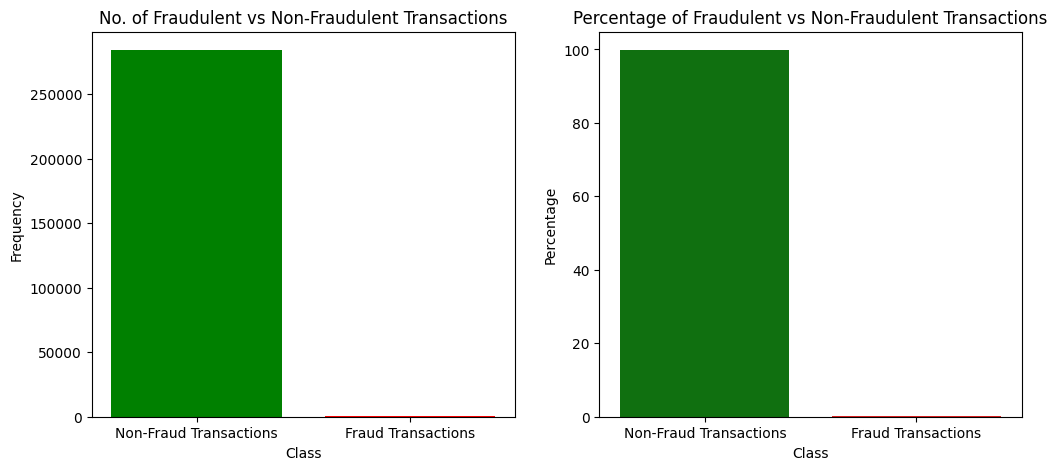

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
counts = df.Class.value_counts()
plt.bar(counts.index, counts, color=['green', 'red'])
plt.title("No. of Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks((0,1),["Non-Fraud Transactions","Fraud Transactions"],rotation=0)


plt.subplot(1,2,2)
df_percent = pd.DataFrame({
    'Class': ['Non-Fraudulent', 'Fraudulent'],
    'Percentage': [normal_share, fraud_share]
})
sns.barplot(data=df_percent, x='Class',y='Percentage', palette =['green','red'])
plt.title("Percentage of Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks((0,1),["Non-Fraud Transactions","Fraud Transactions"],rotation=0)

plt.show()

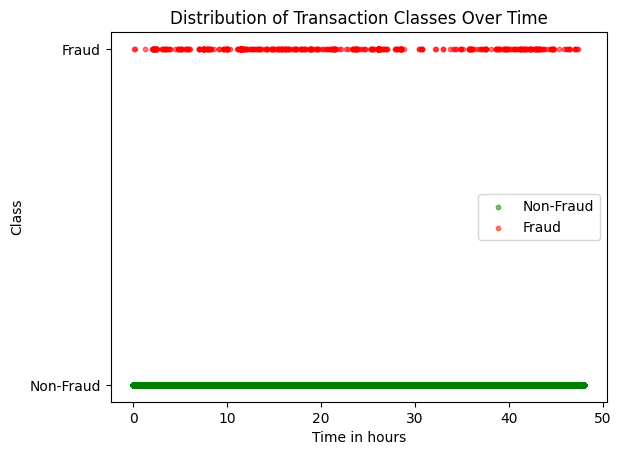

In [9]:
# Creating a scatter plot to observe the distribution of classes with time
# Scatter plot for non-fraud transactions
plt.scatter(df[df['Class'] == 0]['Time']/3600, df[df['Class'] == 0]['Class'],
            color='green', label="Non-Fraud", alpha=0.5, s=10)

# Scatter plot for fraud transactions
plt.scatter(df[df['Class'] == 1]['Time']/3600, df[df['Class'] == 1]['Class'],
            color='red', label="Fraud", alpha=0.5, s=10)

# Labels and title
plt.title("Distribution of Transaction Classes Over Time")
plt.xlabel("Time in hours")
plt.ylabel("Class")
plt.yticks([0, 1], ["Non-Fraud", "Fraud"])
plt.legend()

plt.show()

The lack of a clear time-based trend means time may not be a strong indicator of fraud on its own.

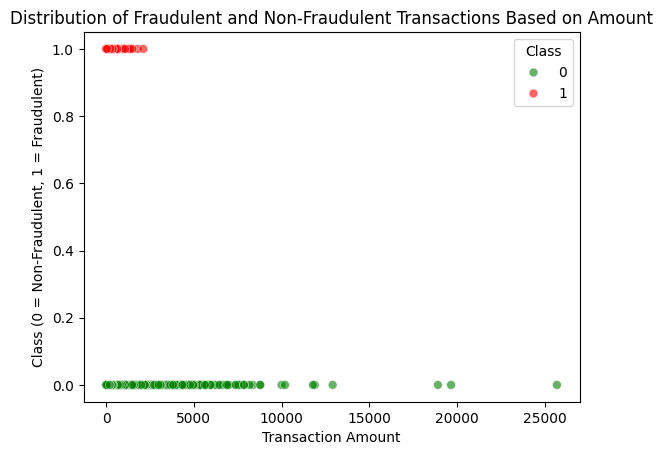

In [10]:
# Creating a scatter plot to observe the distribution of classes with Amount
# Scatter plot for distribution of classes based on Amount
sns.scatterplot(data=df, x='Amount', y='Class', hue='Class',
                palette={0: "green", 1: "red"}, alpha=0.6, s=40)

# Plotting details
plt.title("Distribution of Fraudulent and Non-Fraudulent Transactions Based on Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Class (0 = Non-Fraudulent, 1 = Fraudulent)")

# Show plot
plt.show()

 Amount is a potentially informative feature for fraud detection, as fraudulent transactions are usually on the lower end of the amount scale.

Dropping the Time column: Since Time doesn’t directly help us in predicting fraud, we're removing it to simplify the dataset and reduce potential noise in model training

In [11]:
# Dropping the unnecessary columns
# Dropping the 'Time' column
df = df.drop(columns=['Time'])

# Displaying the updated dataframe to verify
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [12]:
# Defining features and target variable
X = df.drop(columns=['Class'])  # Features (all columns except 'Class')
y = df['Class']  # Target variable

In [13]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Displaying the shape of the resulting splits
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (227845, 29) (227845,)
Testing set: (56962, 29) (56962,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

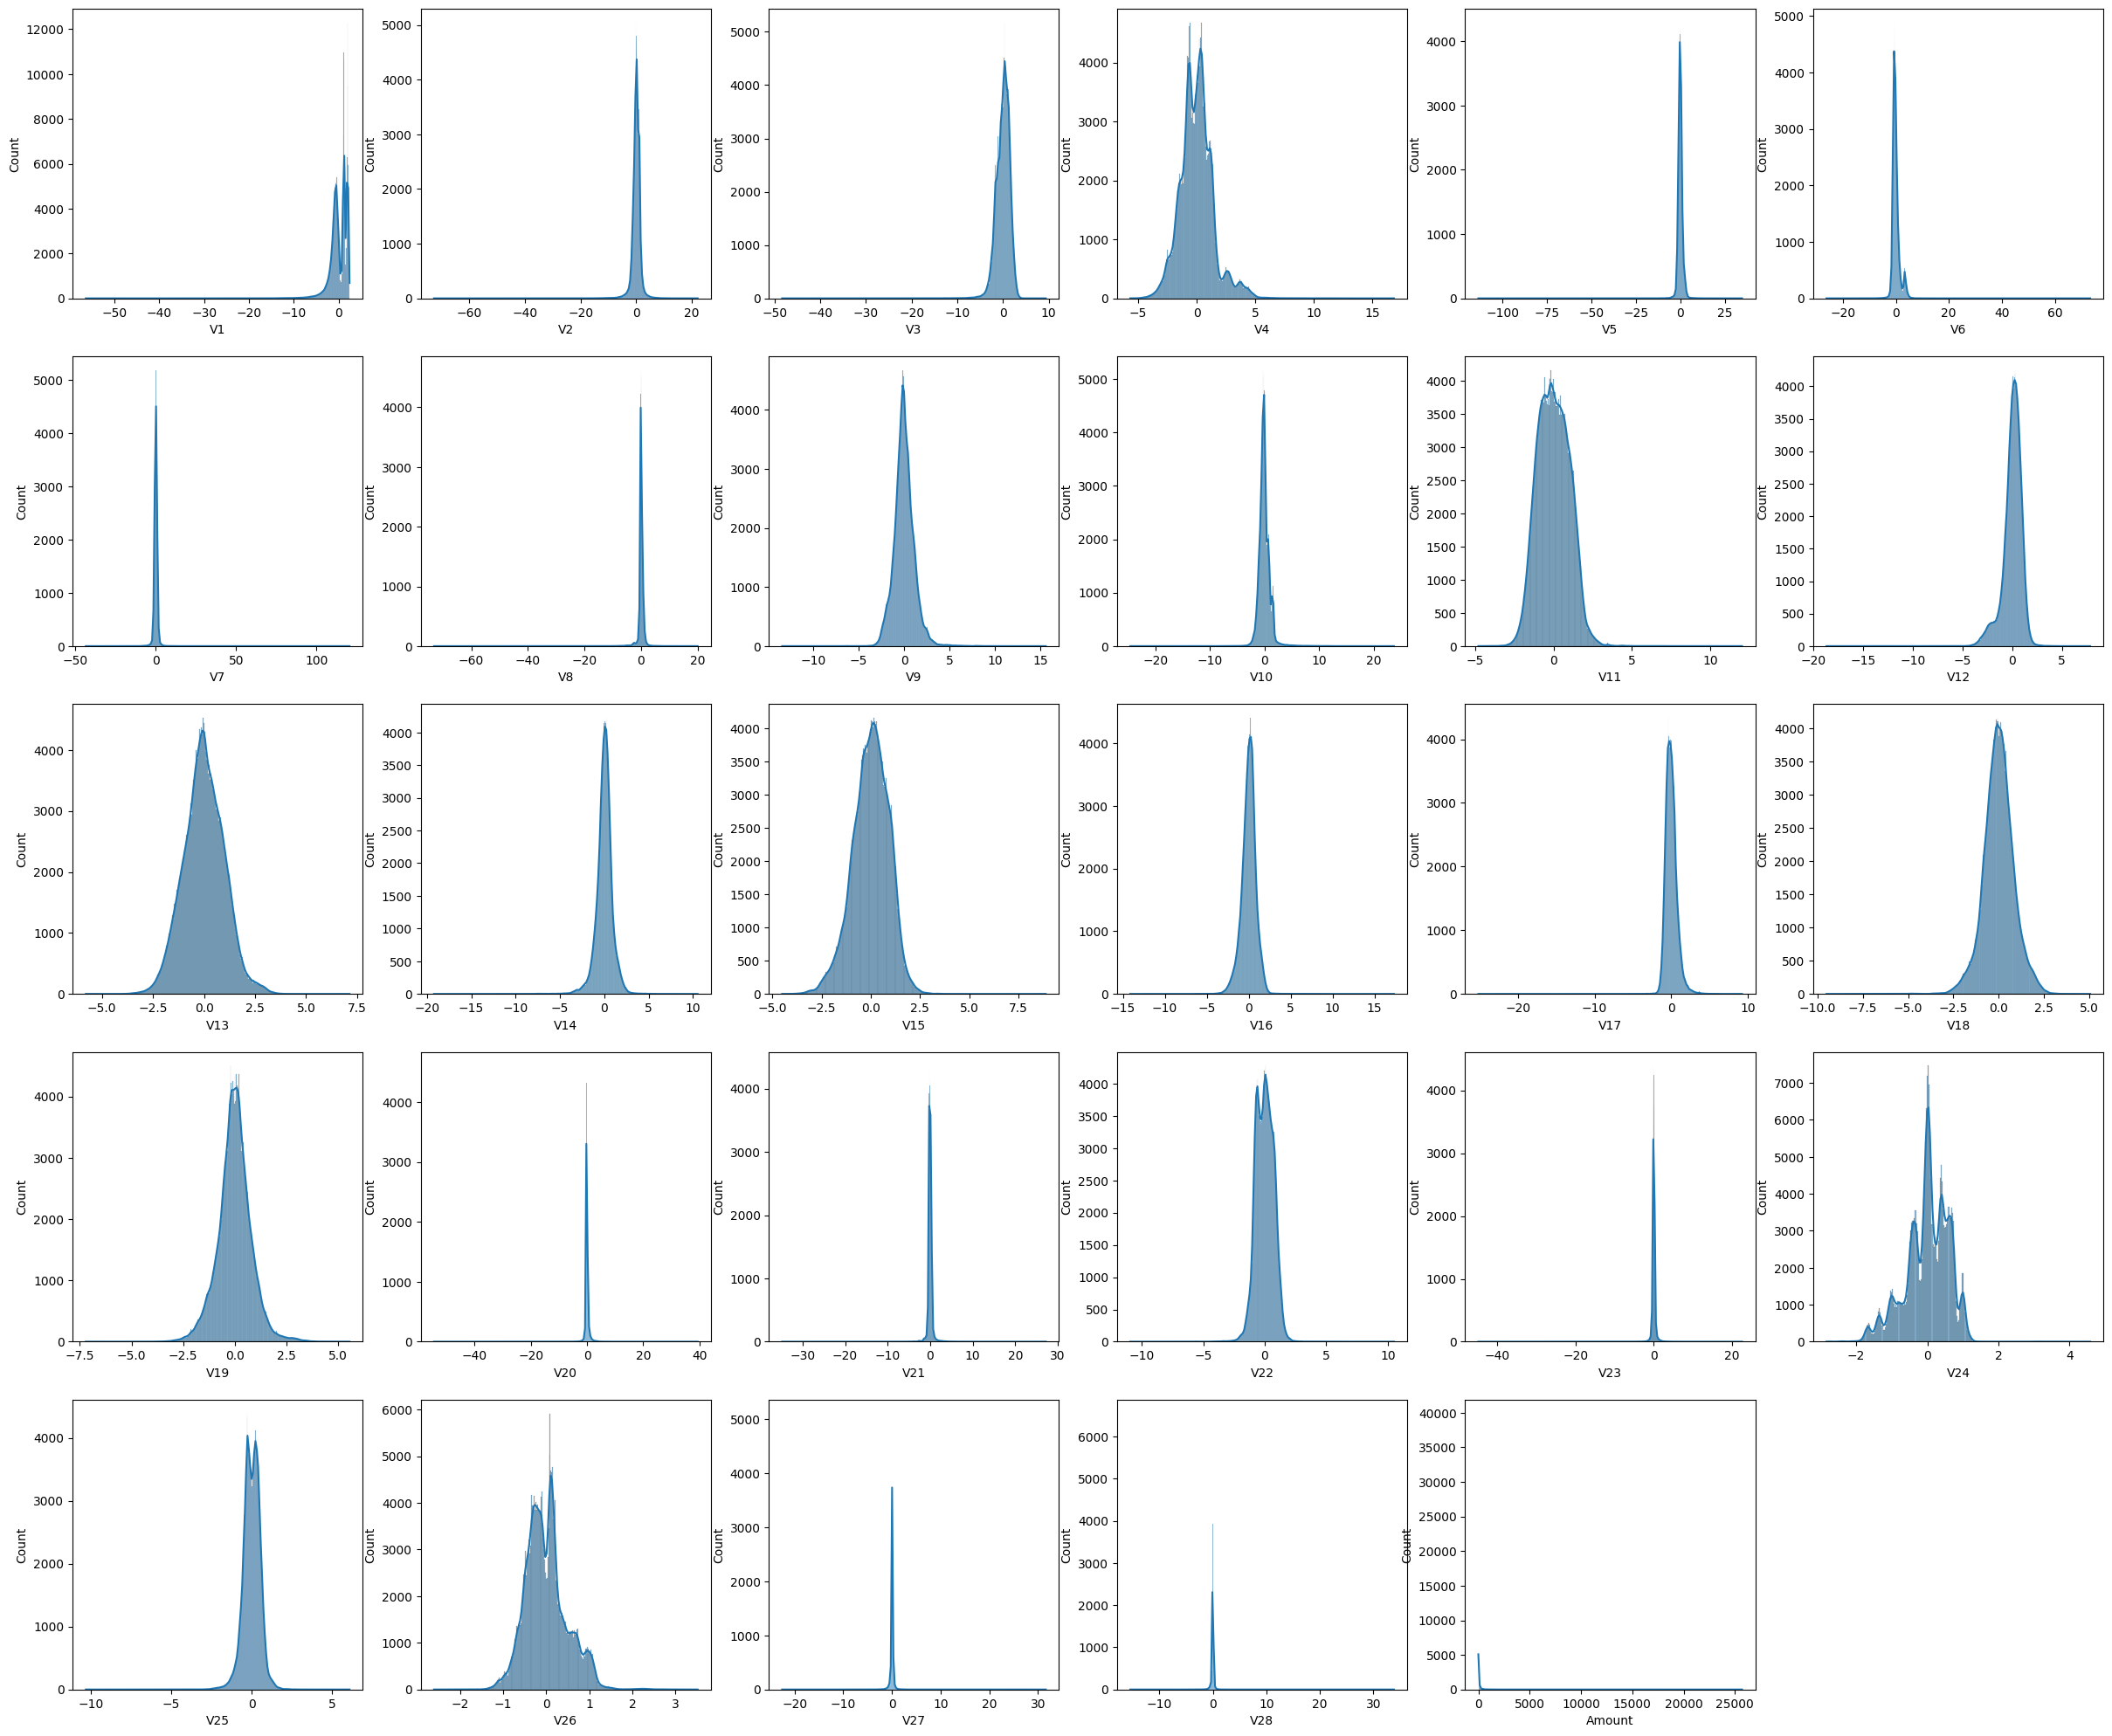

In [16]:
# plotting the histograms for the variables from the dataset to see the skewness
vars = X_train.columns

plt.figure(figsize=(30,25))

for i,var in enumerate(vars):
    plt.subplot(5,6,i+1)
    sns.histplot(X_train[var], kde=True)

plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(copy=False)

# Apply the Power Transformer to all features in the training and test sets
X_train = pd.DataFrame(pt.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(pt.transform(X_test), columns=X_test.columns)

In [18]:
# Verifying the transformation by displaying the first few rows
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.336188,-0.544845,-0.965606,-0.420795,1.098808,2.530347,-1.195983,1.193358,1.254348,-0.106992,...,-0.176355,0.122260,0.393491,0.490592,1.218731,-0.694570,-0.802560,0.182260,-0.090864,-0.604334
1,1.425774,-0.116737,-1.776576,0.252512,2.186342,2.157106,-0.000786,0.641573,0.094536,0.304136,...,-0.296564,0.070475,0.296106,0.045872,1.252675,0.995295,-1.009446,-0.005501,-0.205597,-1.077975
2,-0.754387,0.330483,0.399881,-0.685256,-0.605729,1.414925,-1.789942,-3.636030,0.053256,-2.010828,...,1.674510,-4.186769,0.130424,-0.705914,-1.454362,1.664636,1.729490,0.083143,0.579844,1.205799
3,1.686538,-0.960299,-0.630097,-1.249409,-1.008630,-0.179880,-1.154125,-0.068541,-1.042182,1.564049,...,-0.636737,-0.177824,0.085261,0.327068,-0.924640,-0.562276,-0.262825,0.033199,-0.186850,-0.705232
4,-0.504203,-0.692345,-0.071695,-2.857635,0.512868,-0.008022,0.407953,-0.188334,0.011243,-0.498444,...,-0.358673,-0.323872,-0.258893,-0.022355,-1.981799,-0.588381,-0.223254,-0.092790,-0.190564,0.809789


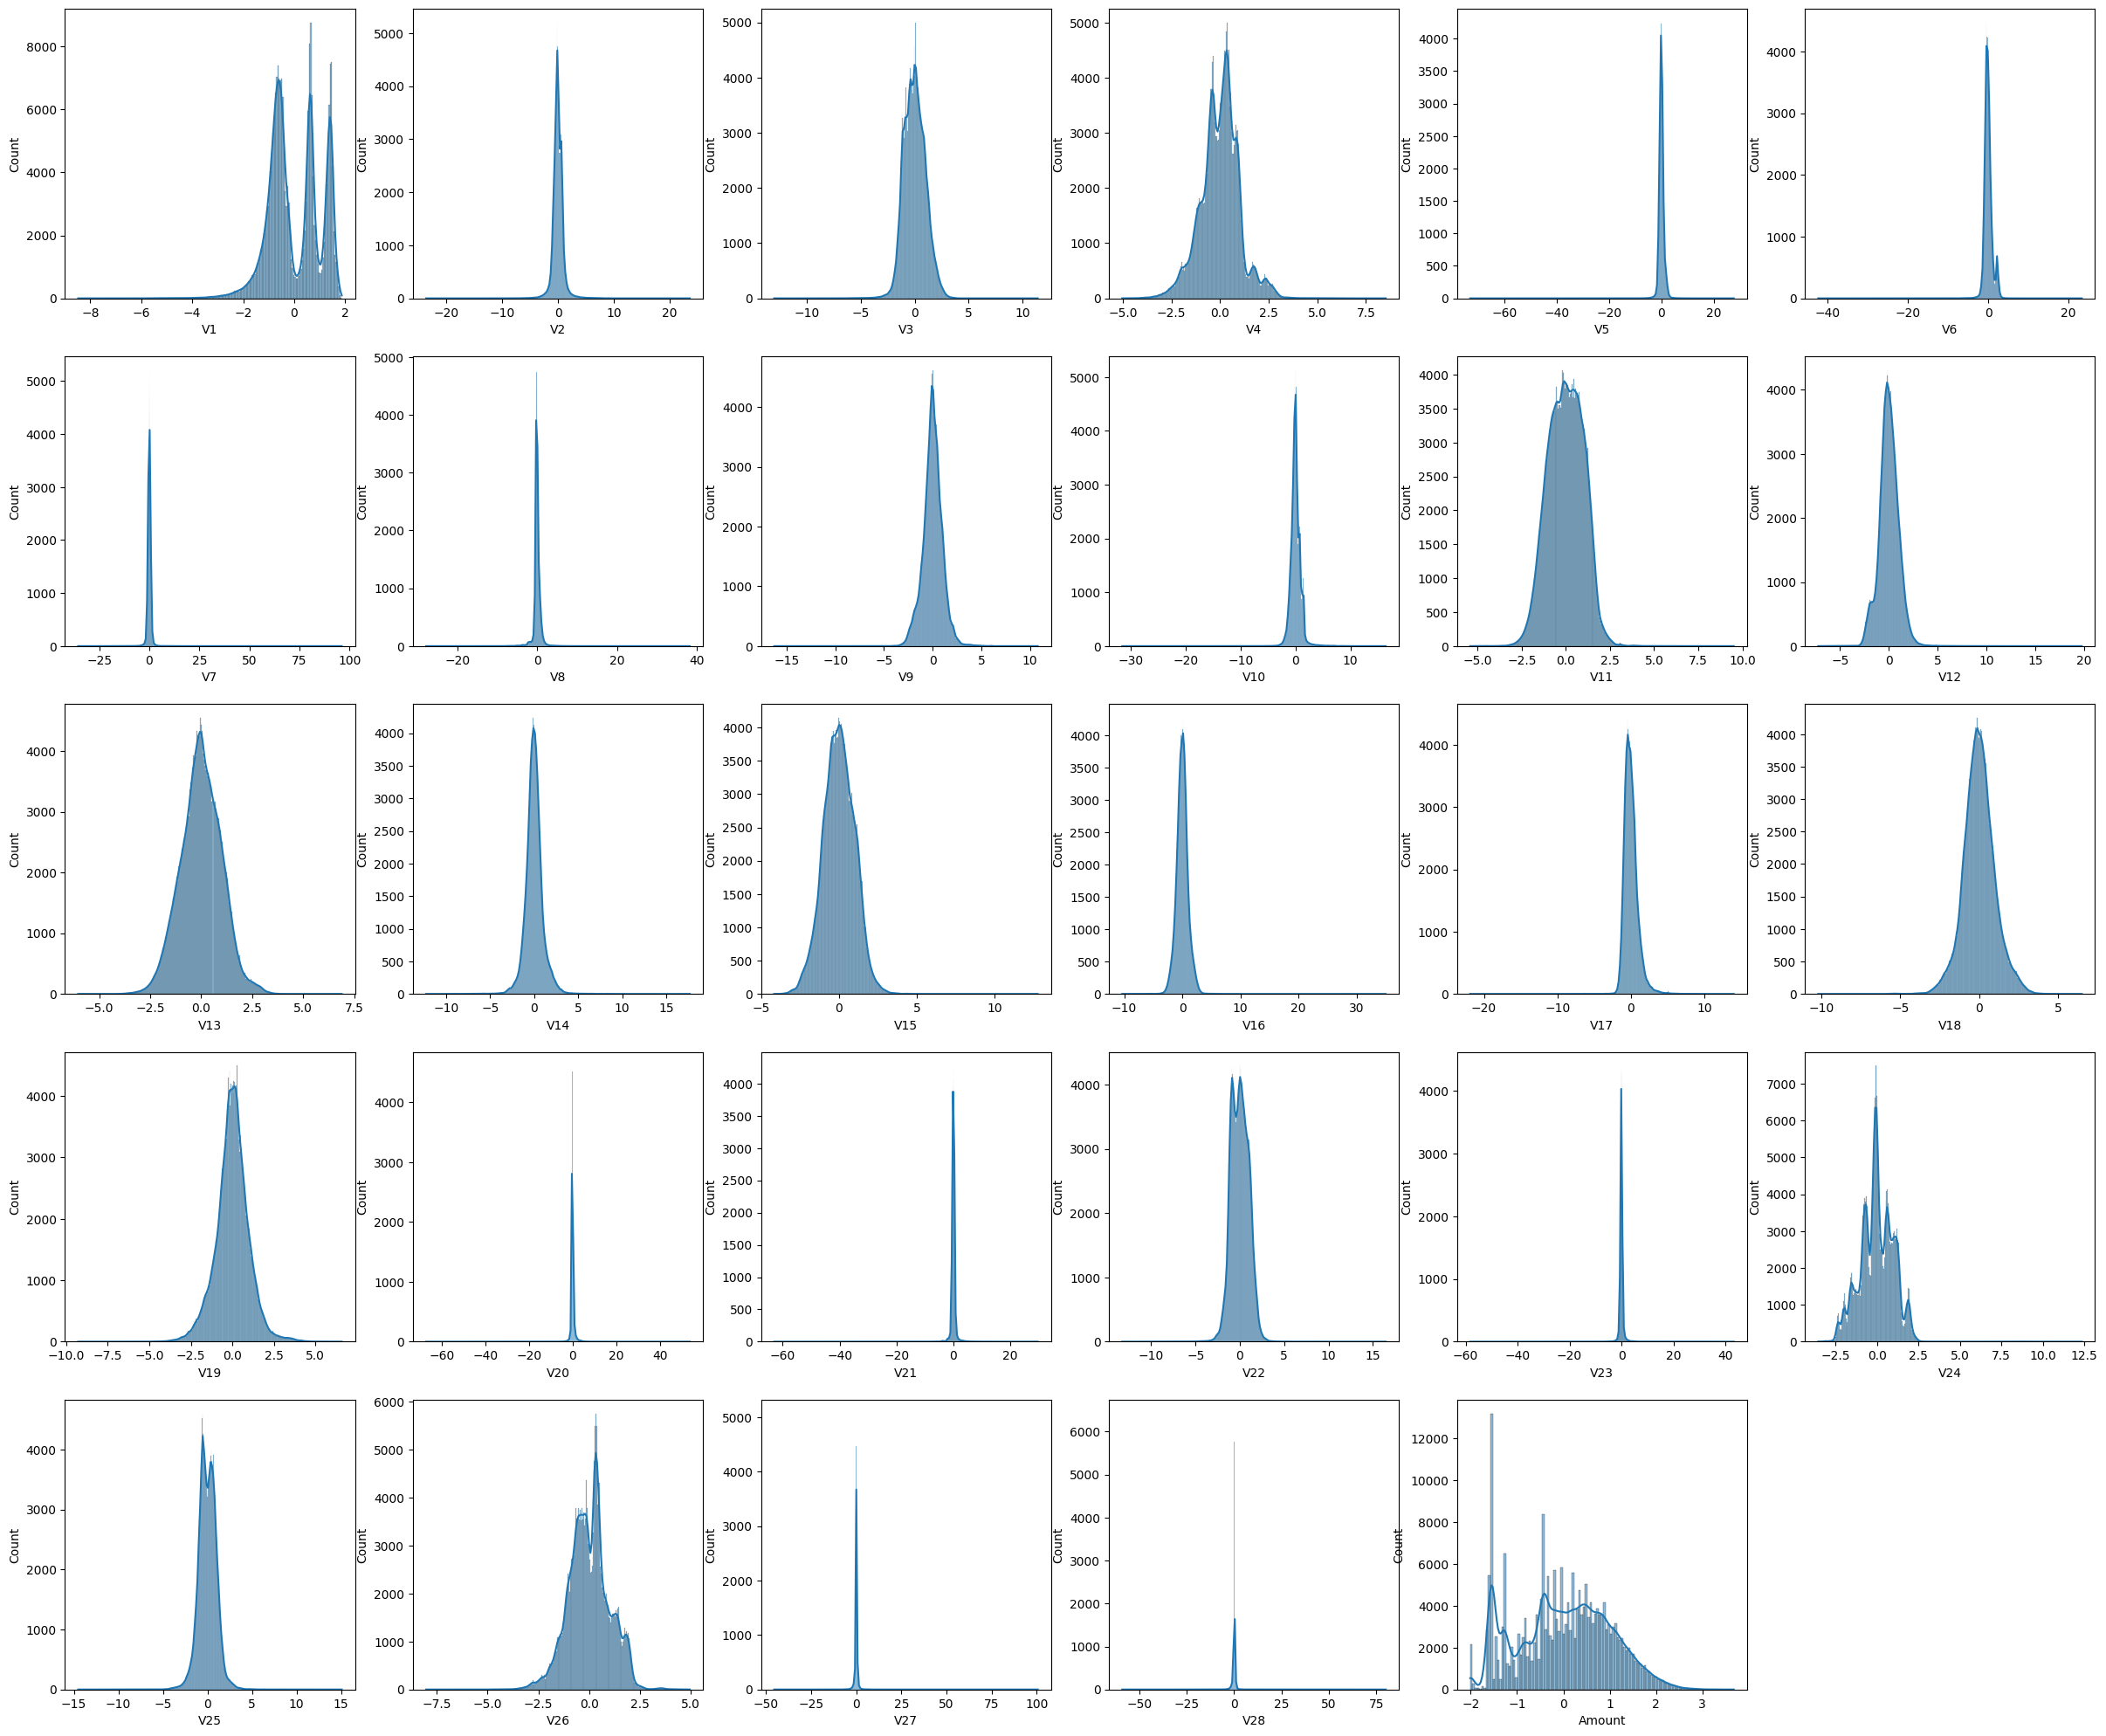

In [19]:
# plot the histogram of a variable from the dataset again to see the result
vars = X_train.columns

plt.figure(figsize=(30,25))

for i,var in enumerate(vars):
    plt.subplot(5,6,i+1)
    sns.histplot(X_train[var], kde=True)

plt.show()

## Model Building on imbalanced dataset
- Build different models on the imbalanced dataset and see the result

SVM: Computationally expensive for large datasets, especially with non-linear kernels.

K-NN: Computationally expensive and memory-intensive, not ideal for very large datasets.

Random Forest: High memory usage, computational cost, and inefficiency in handling large search spaces make it challenging to use for very large datasets.

For large structured datasets, XGBoost is generally the best choice due to its scalability, robustness, and ability to handle complex relationships in the data.

Logistic Regression is an excellent choice for linear relationships and computational efficiency. Decision Trees also perform well but require careful tuning to avoid overfitting. Random Forest, SVM and K-NN should generally be avoided for very large datasets due to computational inefficiencies.



### **1. Logistic Regression**

In [20]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [0.01,0.1,1,10,100,1000]
cv_num = [3, 5, 7, 10]

In [21]:
#Defining a function to get the optimum CV value.

from sklearn.model_selection import cross_val_score, StratifiedKFold

def optimum_cv(cv_values, model, X_train, y_train, suffix="_lr"):

    # Initialize a dictionary to store mean AUC scores for each CV value
    cv_auc_scores = {}

    # Loop over each CV value
    for cv in cv_values:
        # Defining StratifiedKFold with the current number of splits
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

        # Performing cross-validation and compute the mean AUC score
        auc_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
        mean_auc = auc_scores.mean()

        # Storing the mean AUC score for the current CV value
        cv_auc_scores[cv] = mean_auc
        print(f"CV={cv}{suffix}, Mean AUC Score={mean_auc:.4f}")

    # Finding the best CV value based on the highest mean AUC score
    best_cv = max(cv_auc_scores, key=cv_auc_scores.get)
    print(f"\nBest CV value{suffix}: {best_cv} with AUC Score: {cv_auc_scores[best_cv]:.4f}")

    return best_cv, cv_auc_scores



In [22]:
#Logistic Regression for optimal CV

from sklearn.linear_model import LogisticRegression

# Define a range of values for cross-validation folds
cv_values = cv_num

# Define the Logistic Regression model with a baseline configuration
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Using optimum_cv function() to get best CV value for Logistic Regression
best_cv_lr, cv_auc_scores_lr = optimum_cv(cv_values=cv_values, model=lr_model, X_train=X_train, y_train=y_train, suffix="_lr")

CV=3_lr, Mean AUC Score=0.9767
CV=5_lr, Mean AUC Score=0.9806
CV=7_lr, Mean AUC Score=0.9791
CV=10_lr, Mean AUC Score=0.9794

Best CV value_lr: 5 with AUC Score: 0.9806


#### Perfoming cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [23]:
#Defining a function to generate cross-validation on the X_train and y_train datasets into n_splits folds.

from sklearn.model_selection import StratifiedKFold

def generate_cv_splits(X_train, y_train, n_splits, suffix="_lr"):
    # Initialize StratifiedKFold with the given number of splits
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Generating the first train/test split and return
    for train_index, test_index in skf.split(X_train, y_train):
        # Create train and test sets
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        break

    # Printing dimensions for reference
    print(f"X_train_cv{suffix} shape:", X_train_cv.shape)
    print(f"X_test_cv{suffix} shape:", X_test_cv.shape)
    print(f"y_train_cv{suffix} shape:", y_train_cv.shape)
    print(f"y_test_cv{suffix} shape:", y_test_cv.shape)

    # Return the generated splits
    return X_train_cv, X_test_cv, y_train_cv, y_test_cv

In [24]:
#performing cross validation

X_train_cv_lr, X_test_cv_lr, y_train_cv_lr, y_test_cv_lr = generate_cv_splits(X_train, y_train, n_splits=best_cv_lr, suffix="_lr")

X_train_cv_lr shape: (182276, 29)
X_test_cv_lr shape: (45569, 29)
y_train_cv_lr shape: (182276,)
y_test_cv_lr shape: (45569,)


In [25]:
#performing hyperparameter tuning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Defining the parameter distribution for RandomizedSearchCV
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],  # Range of regularization parameter values
    'penalty': ['l1', 'l2']
    }

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize StratifiedKFold with the given number of splits
cv_lr = StratifiedKFold(n_splits=best_cv_lr, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV for hyperparameter tuning with cross-validation
random_search_lr = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=10,  # Number of random combinations to test
                                   scoring='roc_auc',
                                   cv=cv_lr,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42,
                                   return_train_score=True)

# Fitting RandomizedSearchCV on the training data
random_search_lr.fit(X_train_cv_lr, y_train_cv_lr)

# Output best parameters and best score
print("Best parameters found:", random_search_lr.best_params_)
print("Best cross-validation AUC score:", random_search_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'penalty': 'l2', 'C': 10}
Best cross-validation AUC score: 0.9764390781638734


In [26]:
# Defining function to evaluate model on Cross-Validated train and test datasets and display evaluation results

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluation(model,X_trn,X_tst,y_trn,y_tst):

  # Fitting the model on the training data
  model.fit(X_trn, y_trn)

  # Predictions on the training set
  y_train_pred = model.predict(X_trn)
  y_train_pred_proba = model.predict_proba(X_trn)[:, 1]

  # Predictions on the test set
  y_test_pred = model.predict(X_tst)
  y_test_pred_proba = model.predict_proba(X_tst)[:, 1]

  # Calculating evaluation metrics for the training set
  train_accuracy = accuracy_score(y_trn, y_train_pred)
  train_precision = precision_score(y_trn, y_train_pred)
  train_recall = recall_score(y_trn, y_train_pred)
  train_f1 = f1_score(y_trn, y_train_pred)
  train_auc_score = roc_auc_score(y_trn, y_train_pred_proba)

  # Calculating evaluation metrics for the test set
  test_accuracy = accuracy_score(y_tst, y_test_pred)
  test_precision = precision_score(y_tst, y_test_pred)
  test_recall = recall_score(y_tst, y_test_pred)
  test_f1 = f1_score(y_tst, y_test_pred)
  test_auc_score = roc_auc_score(y_tst, y_test_pred_proba)

  # Printing evaluation results for the training set
  print("Training Set Evaluation Results:")
  print(f"Accuracy: {train_accuracy:.4f}")
  print(f"Precision: {train_precision:.2f}")
  print(f"Recall: {train_recall:.2f}")
  print(f"F1 Score: {train_f1:.2f}")
  print(f"AUC Score: {train_auc_score:.4f}")

  # Printing evaluation results for the test set
  print("\nTest Set Evaluation Results:")
  print(f"Accuracy: {test_accuracy:.4f}")
  print(f"Precision: {test_precision:.2f}")
  print(f"Recall: {test_recall:.2f}")
  print(f"F1 Score: {test_f1:.2f}")
  print(f"AUC Score: {test_auc_score:.4f}")

#### Logistic Regression with optimal C : Prediction and model evalution on the cross-validated train and test  sets.

In [27]:
#printing the evaluation result by choosing a evaluation metric

# Initialize Logistic Regression with best hyperparameters from tuning
best_params_lr = random_search_lr.best_params_
best_lr_model = LogisticRegression(**best_params_lr, max_iter=1000, random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_lr_model,X_train_cv_lr,X_test_cv_lr,y_train_cv_lr,y_test_cv_lr)

Training Set Evaluation Results:
Accuracy: 0.9993
Precision: 0.90
Recall: 0.66
F1 Score: 0.76
AUC Score: 0.9813

Test Set Evaluation Results:
Accuracy: 0.9993
Precision: 0.91
Recall: 0.63
F1 Score: 0.74
AUC Score: 0.9928


In [28]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_lr = random_search_lr.best_score_

print("Best Hyperparameters:", best_params_lr)
print("Best Cross-Validation AUC Score:", best_score_lr)

Best Hyperparameters: {'penalty': 'l2', 'C': 10}
Best Cross-Validation AUC Score: 0.9764390781638734


### **2. Decision Tree**

In [29]:
#Decision Tree optimal CV value.
from sklearn.tree import DecisionTreeClassifier

# Defining a range of values for cross-validation folds
cv_values = [3, 5, 7, 10]  # You can add more values based on preference

# Defining the Decision Tree model with a baseline configuration
dt_model = DecisionTreeClassifier(random_state=42)

# Using optimum_cv function() to get best CV value for Logistic Regression
best_cv_dt, cv_auc_scores_dt = optimum_cv(cv_values=cv_values, model=dt_model, X_train=X_train, y_train=y_train, suffix="_dt")

CV=3_dt, Mean AUC Score=0.8741
CV=5_dt, Mean AUC Score=0.8818
CV=7_dt, Mean AUC Score=0.8868
CV=10_dt, Mean AUC Score=0.8743

Best CV value_dt: 7 with AUC Score: 0.8868


In [30]:
#performing cross validation

X_train_cv_dt, X_test_cv_dt, y_train_cv_dt, y_test_cv_dt = generate_cv_splits(X_train, y_train, n_splits=best_cv_dt, suffix="_dt")

X_train_cv_dt shape: (195295, 29)
X_test_cv_dt shape: (32550, 29)
y_train_cv_dt shape: (195295,)
y_test_cv_dt shape: (32550,)


In [31]:
#Decision Tree using RamdomizedSearchCV()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

# Defining a parameter distribution for RandomizedSearchCV
param_dist = {
    'max_depth': [3, 5, 7, 10, None],  # Limiting depth
    'min_samples_split': randint(2, 20),  # Random range for min samples split
    'min_samples_leaf': randint(1, 20),   # Random range for min samples leaf
    'max_features': ['sqrt', 'log2', None]  # Limiting features used at each split
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Using StratifiedKFold for better class balance in each fold
cv_dt = StratifiedKFold(n_splits=best_cv_dt, shuffle=True, random_state=42)

# Setting up RandomizedSearchCV with AUC as scoring metric and StratifiedKFold cross-validation
random_search_dt = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to sample
    scoring='roc_auc',
    cv=cv_dt,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fitting RandomizedSearchCV on the training data
random_search_dt.fit(X_train_cv_dt, y_train_cv_dt)

# Output best parameters and best score
print("Best parameters found:", random_search_dt.best_params_)
print("Best cross-validation AUC score:", random_search_dt.best_score_)

Fitting 7 folds for each of 20 candidates, totalling 140 fits
Best parameters found: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 12, 'min_samples_split': 9}
Best cross-validation AUC score: 0.9294288039977107


#### Decision Tree with optimal C : Prediction and model evalution on the cross-validated train and test  sets.

In [32]:
#printing the evaluation result by choosing a evaluation metric

# Initialize Decision Tree with best hyperparameters from tuning
best_params_dt = random_search_dt.best_params_
best_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_dt_model,X_train_cv_dt,X_test_cv_dt,y_train_cv_dt,y_test_cv_dt)

Training Set Evaluation Results:
Accuracy: 0.9995
Precision: 0.94
Recall: 0.77
F1 Score: 0.85
AUC Score: 0.9685

Test Set Evaluation Results:
Accuracy: 0.9994
Precision: 0.88
Recall: 0.77
F1 Score: 0.82
AUC Score: 0.9448


In [33]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_dt = random_search_dt.best_score_

print("Best Hyperparameters:")
for param, value in best_params_dt.items():
  print(f"\t{param}: {value}")
print("Best Cross-Validation AUC Score:", best_score_dt)

Best Hyperparameters:
	max_depth: 10
	max_features: None
	min_samples_leaf: 12
	min_samples_split: 9
Best Cross-Validation AUC Score: 0.9294288039977107


### **3. XGBoost**

In [34]:
#XGBoost optimal CV

from xgboost import XGBClassifier

# Defining a range of values for cross-validation folds
cv_values = [3, 5, 7]

# Defining the XGBoost model with a baseline configuration
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)

# Using optimum_cv function to get the best CV value for XGBoost
best_cv_xgb, cv_auc_scores_xgb = optimum_cv(cv_values=cv_values, model=xgb_model, X_train=X_train, y_train=y_train, suffix="_xgb")

CV=3_xgb, Mean AUC Score=0.9808
CV=5_xgb, Mean AUC Score=0.9782
CV=7_xgb, Mean AUC Score=0.9798

Best CV value_xgb: 3 with AUC Score: 0.9808


In [35]:
#performing cross validation

X_train_cv_xgb, X_test_cv_xgb, y_train_cv_xgb, y_test_cv_xgb = generate_cv_splits(X_train, y_train, n_splits=best_cv_xgb, suffix="_xgb")

X_train_cv_xgb shape: (151896, 29)
X_test_cv_xgb shape: (75949, 29)
y_train_cv_xgb shape: (151896,)
y_test_cv_xgb shape: (75949,)


In [36]:
#performing hyperparameter tuning RandomizedSearchCV

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

# Defining a parameter distribution for RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': randint(50, 200),  # Number of trees in the boosting process
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of each tree
    'learning_rate': uniform(0.01, 0.3),  # Learning rate as a continuous uniform distribution
    'subsample': uniform(0.5, 0.5),  # Subsampling ratio for the training instances
    'colsample_bytree': uniform(0.5, 0.5),  # Subsampling ratio for columns
    'gamma': uniform(0, 5)  # Minimum loss reduction required to make a further partition
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)

# Using StratifiedKFold for better class balance in each fold
cv_xgb = StratifiedKFold(n_splits=best_cv_xgb, shuffle=True, random_state=42)

# Setting up RandomizedSearchCV with AUC as scoring metric and StratifiedKFold cross-validation
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=10,  # Number of parameter settings to sample
    scoring='roc_auc',
    cv=cv_xgb,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fitting RandomizedSearchCV on the training data
random_search_xgb.fit(X_train_cv_xgb, y_train_cv_xgb)

# Output best parameters and best score
print("Best parameters found:", random_search_xgb.best_params_)
print("Best cross-validation AUC score:", random_search_xgb.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'colsample_bytree': 0.5102922471479012, 'gamma': 4.8495492608099715, 'learning_rate': 0.2597327922401265, 'max_depth': 5, 'n_estimators': 70, 'subsample': 0.8087407548138583}
Best cross-validation AUC score: 0.9805795723573318


#### XGBoost with optimal C : Prediction and model evalution on the cross-validated train and test  sets.

In [37]:
#printing the evaluation result by choosing a evaluation metric

# Initialize XGBoost with best hyperparameters from tuning
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='auc', random_state=42)

# Using evaluation() function to print evaluation metrics
evaluation(best_xgb_model, X_train_cv_xgb, X_test_cv_xgb, y_train_cv_xgb, y_test_cv_xgb)

Training Set Evaluation Results:
Accuracy: 0.9997
Precision: 0.96
Recall: 0.83
F1 Score: 0.89
AUC Score: 0.9961

Test Set Evaluation Results:
Accuracy: 0.9996
Precision: 0.96
Recall: 0.79
F1 Score: 0.87
AUC Score: 0.9799


In [38]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_xgb = random_search_xgb.best_score_

print("Best Hyperparameters:")
for param, value in best_params_xgb.items():
  print(f"\t{param}: {value}")
print("Best Cross-Validation AUC Score:", best_score_xgb)

Best Hyperparameters:
	colsample_bytree: 0.5102922471479012
	gamma: 4.8495492608099715
	learning_rate: 0.2597327922401265
	max_depth: 5
	n_estimators: 70
	subsample: 0.8087407548138583
Best Cross-Validation AUC Score: 0.9805795723573318


##### From the evaluation results, the XGBoost model demonstrates the strongest performance across both training and test sets. It has the highest recall, F1 score, and AUC score in the test set, indicating robust predictive power and generalization.

#### **Proceeding with the XGBoost model as it shows the best result**
- Applying the best hyperparameter on the XGBoost model
- Predicting on the test dataset

In [39]:
from sklearn.metrics import roc_auc_score

# Initialize the model with the best hyperparameters for XGBoost
clf = XGBClassifier(
    **best_params_xgb,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

# Fitting the model on the training data
clf.fit(X_train, y_train)

# Predicting probabilities for the positive class
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]
y_test_pred = clf.predict(X_test)

# Calculating the AUC score
test_auc_score = roc_auc_score(y_test, y_test_pred_proba)

# Additional metrics for evaluation
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Printing the evaluation results
print(f"Test AUC Score: {test_auc_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

Test AUC Score: 0.9735
Test Accuracy: 0.9995
Test Precision: 0.93
Test Recall: 0.80
Test F1 Score: 0.86


### Print the important features of the XGBoost model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 7
2nd Top var = 14
3rd Top var = 11


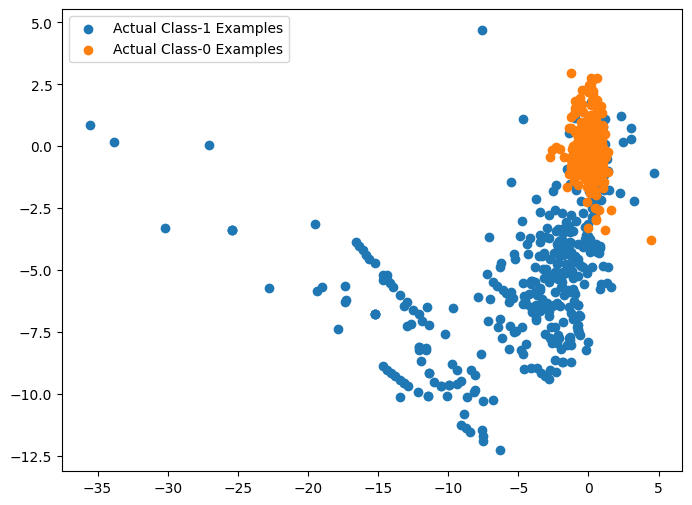

In [40]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## **Model building with balancing Classes**

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [41]:
#Importing packages
from imblearn import over_sampling

### **Random Oversampling**
- Build different models on the balanced dataset and see the result

In [42]:
# Importing the package
from imblearn.over_sampling import RandomOverSampler

### **1. Logistic Regression**

#### We have already perfomed cross validation on the X_train & y_train with optimum number of CV folds  to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [43]:
#Printing cross validated X_train and y_train

print("X_train_cv_lr shape:", X_train_cv_lr.shape)
print("X_test_cv_lr shape:", X_test_cv_lr.shape)
print("y_train_cv_lr shape:", y_train_cv_lr.shape)
print("y_test_cv_lr shape:", y_test_cv_lr.shape)

X_train_cv_lr shape: (182276, 29)
X_test_cv_lr shape: (45569, 29)
y_train_cv_lr shape: (182276,)
y_test_cv_lr shape: (45569,)


In [44]:
#Balancing classes on X_train_cv_lr & y_train_cv_lr using Random Oversampling

# Initialize RandomOverSampler
ros_lr = RandomOverSampler(random_state=42)

# Fitting and resample the training data
X_train_ros_lr, y_train_ros_lr = ros_lr.fit_resample(X_train_cv_lr, y_train_cv_lr)

# Displaying the new class distribution
print("Class distribution after oversampling:", dict(pd.Series(y_train_ros_lr).value_counts()))

Class distribution after oversampling: {0: 181960, 1: 181960}


In [45]:
#performing hyperparameter tuning

# Defining the parameter grid for RandomizedSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Range of regularization parameter values
    'penalty': ['l1', 'l2']        # Regularization types (L1, L2)
}

# Initialize the Logistic Regression model
lr_ros_model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize StratifiedKFold for cross-validation
cv_ros_dt = StratifiedKFold(n_splits=best_cv_lr, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_ros_lr = RandomizedSearchCV(estimator=lr_ros_model,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='roc_auc',
                                   cv=cv_ros_dt,
                                   random_state=42,
                                   n_jobs=-1,
                                   verbose=1)

# Fitting RandomizedSearchCV on one set of resampled data as an example
random_search_ros_lr.fit(X_train_ros_lr, y_train_ros_lr)

# Output best parameters and best score
print("Best parameters found:", random_search_ros_lr.best_params_)
print("Best cross-validation AUC score:", random_search_ros_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'penalty': 'l2', 'C': 100}
Best cross-validation AUC score: 0.9873422034698404


In [46]:
#printing the evaluation result by choosing a evaluation metric

# Initialize Logistic Regression with best hyperparameters from tuning
best_params_ros_lr = random_search_ros_lr.best_params_
best_ros_lr_model = LogisticRegression(**best_params_ros_lr, max_iter=1000, random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_ros_lr_model,X_train_ros_lr,X_test_cv_lr,y_train_ros_lr,y_test_cv_lr)

Training Set Evaluation Results:
Accuracy: 0.9498
Precision: 0.97
Recall: 0.93
F1 Score: 0.95
AUC Score: 0.9874

Test Set Evaluation Results:
Accuracy: 0.9718
Precision: 0.05
Recall: 0.94
F1 Score: 0.10
AUC Score: 0.9928


The model performs well on the training set, but the test set results show a significant drop in precision and F1 score, which might indicate overfitting or an issue with how the model generalizes to unseen data.

In [47]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_ros_lr = random_search_ros_lr.best_score_

print("Best Hyperparameters:", best_params_ros_lr)
print("Best Cross-Validation AUC Score:", best_score_ros_lr)

Best Hyperparameters: {'penalty': 'l2', 'C': 100}
Best Cross-Validation AUC Score: 0.9873422034698404


### **2. Decison Tree**

We have already perfomed cross validation on the X_train & y_train with optimum number of CV folds for decision tree algorithm to create:
- X_train_cv_dt
- X_test_cv_dt
- y_train_cv_dt
- y_test_cv_dt

In [48]:
#Printing cross validated X_train and y_train

print("X_train_cv_dt shape:", X_train_cv_dt.shape)
print("X_test_cv_dt shape:", X_test_cv_dt.shape)
print("y_train_cv_dt shape:", y_train_cv_dt.shape)
print("y_test_cv_dt shape:", y_test_cv_dt.shape)

X_train_cv_dt shape: (195295, 29)
X_test_cv_dt shape: (32550, 29)
y_train_cv_dt shape: (195295,)
y_test_cv_dt shape: (32550,)


In [49]:
#Balancing classes on X_train_cv_dt & y_train_cv_dt using Random Oversampling

# Initialize RandomOverSampler
ros_dt = RandomOverSampler(random_state=42)

# Fitting and resample the training data
X_train_ros_dt, y_train_ros_dt = ros_dt.fit_resample(X_train_cv_dt, y_train_cv_dt)

# Displaying the new class distribution
print("Class distribution after oversampling:", dict(pd.Series(y_train_ros_dt).value_counts()))

Class distribution after oversampling: {0: 194958, 1: 194958}


In [50]:
#performing hyperparameter tuning

# Defining the parameter grid for RandomizedSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],           # Range of maximum depth values to control overfitting
    'min_samples_split': randint(2, 20),          # Random range for min samples split
    'min_samples_leaf': randint(1, 20),           # Random range for min samples leaf
    'max_features': ['sqrt', 'log2', None]        # Number of features to consider when looking for the best split
}

# Initialize the Decision Tree model
dt_ros_model = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold for cross-validation
cv_ros_dt = StratifiedKFold(n_splits=best_cv_dt, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_ros_dt = RandomizedSearchCV(estimator=dt_ros_model,
                                          param_distributions=param_grid_dt,
                                          n_iter=10,
                                          scoring='roc_auc',
                                          cv=cv_ros_dt,
                                          random_state=42,
                                          n_jobs=-1,
                                          verbose=1)

# Fitting RandomizedSearchCV on the resampled training data
random_search_ros_dt.fit(X_train_ros_dt, y_train_ros_dt)

# Output best parameters and best score
print("Best parameters found:", random_search_ros_dt.best_params_)
print("Best cross-validation AUC score:", random_search_ros_dt.best_score_)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 12}
Best cross-validation AUC score: 0.9997928986339943


In [51]:
#printing the evaluation result by choosing a evaluation metric

# Initialize Decision Tree with best hyperparameters from tuning
best_params_ros_dt = random_search_ros_dt.best_params_
best_ros_dt_model = DecisionTreeClassifier(**best_params_ros_dt, random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_ros_dt_model,X_train_ros_dt,X_test_cv_dt,y_train_ros_dt,y_test_cv_dt)

Training Set Evaluation Results:
Accuracy: 0.9997
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC Score: 1.0000

Test Set Evaluation Results:
Accuracy: 0.9990
Precision: 0.68
Recall: 0.81
F1 Score: 0.74
AUC Score: 0.9033


The model is promising but shows signs of overfitting.
Random Oversampling worked to a degree, but further tuning or different balancing techniques might yield even better results.

In [52]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_ros_dt = random_search_ros_dt.best_score_

print("Best Hyperparameters:")
for param, value in best_params_ros_dt.items():
  print(f"\t{param}: {value}")
print("Best Cross-Validation AUC Score:", best_score_ros_dt)

Best Hyperparameters:
	max_depth: None
	max_features: sqrt
	min_samples_leaf: 7
	min_samples_split: 12
Best Cross-Validation AUC Score: 0.9997928986339943


### **3. XGBoost**

We have already perfomed cross validation on the X_train & y_train with optimum number of CV folds for XGBoost algorithm to create:
- X_train_cv_xgb
- X_test_cv_xgb
- y_train_cv_xgb
- y_test_cv_xgb

In [53]:
#Printing cross validated X_train and y_train

print("X_train_cv_xgb shape:", X_train_cv_xgb.shape)
print("X_test_cv_xgb shape:", X_test_cv_xgb.shape)
print("y_train_cv_xgb shape:", y_train_cv_xgb.shape)
print("y_test_cv_xgb shape:", y_test_cv_xgb.shape)

X_train_cv_xgb shape: (151896, 29)
X_test_cv_xgb shape: (75949, 29)
y_train_cv_xgb shape: (151896,)
y_test_cv_xgb shape: (75949,)


In [54]:
#Balancing classes on X_train_cv_dt & y_train_cv_dt using Random Oversampling

# Initialize RandomOverSampler
ros_xgb = RandomOverSampler(random_state=42)

# Fitting and resample the training data
X_train_ros_xgb, y_train_ros_xgb = ros_xgb.fit_resample(X_train_cv_xgb, y_train_cv_xgb)

# Displaying the new class distribution
print("Class distribution after oversampling:", dict(pd.Series(y_train_ros_xgb).value_counts()))

Class distribution after oversampling: {0: 151634, 1: 151634}


In [55]:
#performing hyperparameter tuning RandomizedSearchCV

# Defining a parameter distribution for RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': randint(50, 200),  # Number of trees in the boosting process
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of each tree
    'learning_rate': uniform(0.01, 0.3),  # Learning rate as a continuous uniform distribution
    'subsample': uniform(0.5, 0.5),  # Subsampling ratio for the training instances
    'colsample_bytree': uniform(0.5, 0.5),  # Subsampling ratio for columns
    'gamma': uniform(0, 5)  # Minimum loss reduction required to make a further partition
}

# Initialize the XGBoost model
xgb_ros_model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)

# Using StratifiedKFold for better class balance in each fold
cv_ros_xgb = StratifiedKFold(n_splits=best_cv_xgb, shuffle=True, random_state=42)

# Setting up RandomizedSearchCV with AUC as scoring metric and StratifiedKFold cross-validation
random_search_ros_xgb = RandomizedSearchCV(
    estimator=xgb_ros_model,
    param_distributions=param_dist_xgb,
    n_iter=10,  # Number of parameter settings to sample
    scoring='roc_auc',
    cv=cv_ros_xgb,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fitting RandomizedSearchCV on the training data
random_search_ros_xgb.fit(X_train_ros_xgb, y_train_ros_xgb)

# Output best parameters and best score
print("Best parameters found:", random_search_ros_xgb.best_params_)
print("Best cross-validation AUC score:", random_search_ros_xgb.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'colsample_bytree': 0.7962072844310213, 'gamma': 0.23225206359998862, 'learning_rate': 0.1922634555704315, 'max_depth': None, 'n_estimators': 122, 'subsample': 0.5325257964926398}
Best cross-validation AUC score: 0.999992219213555


In [56]:
#printing the evaluation result by choosing a evaluation metric

# Initialize XGBoost with best hyperparameters from tuning
best_params_ros_xgb = random_search_ros_xgb.best_params_
best_ros_xgb_model = XGBClassifier(**best_params_ros_xgb, use_label_encoder=False, eval_metric='auc', random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_ros_xgb_model,X_train_ros_xgb,X_test_cv_xgb,y_train_ros_xgb,y_test_cv_xgb)

Training Set Evaluation Results:
Accuracy: 1.0000
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC Score: 1.0000

Test Set Evaluation Results:
Accuracy: 0.9995
Precision: 0.90
Recall: 0.80
F1 Score: 0.84
AUC Score: 0.9820


This XGBoost model is robust, achieving a high AUC and good F1 score on the test set. For practical purposes, slight improvements in recall could enhance its fraud-detection sensitivity.

In [57]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_ros_xgb = random_search_ros_xgb.best_score_

print("Best Hyperparameters:")
for param, value in best_params_ros_xgb.items():
  print(f"\t{param}: {value}")
print("Best Cross-Validation AUC Score:", best_score_ros_xgb)

Best Hyperparameters:
	colsample_bytree: 0.7962072844310213
	gamma: 0.23225206359998862
	learning_rate: 0.1922634555704315
	max_depth: None
	n_estimators: 122
	subsample: 0.5325257964926398
Best Cross-Validation AUC Score: 0.999992219213555


XGBoost model is the best choice for fraud detection in this context, as it achieves the highest overall performance with a strong balance of precision, recall, F1 Score, and AUC on the test set. Its high precision and recall mean it effectively catches fraud cases while minimizing false positives, making it a more reliable option for real-world application in fraud detection.

## **SMOTE**
- Build different models on the balanced dataset and see the result

### Print the class distribution after applying SMOTE

In [58]:
# Importing the package
from imblearn.over_sampling import SMOTE

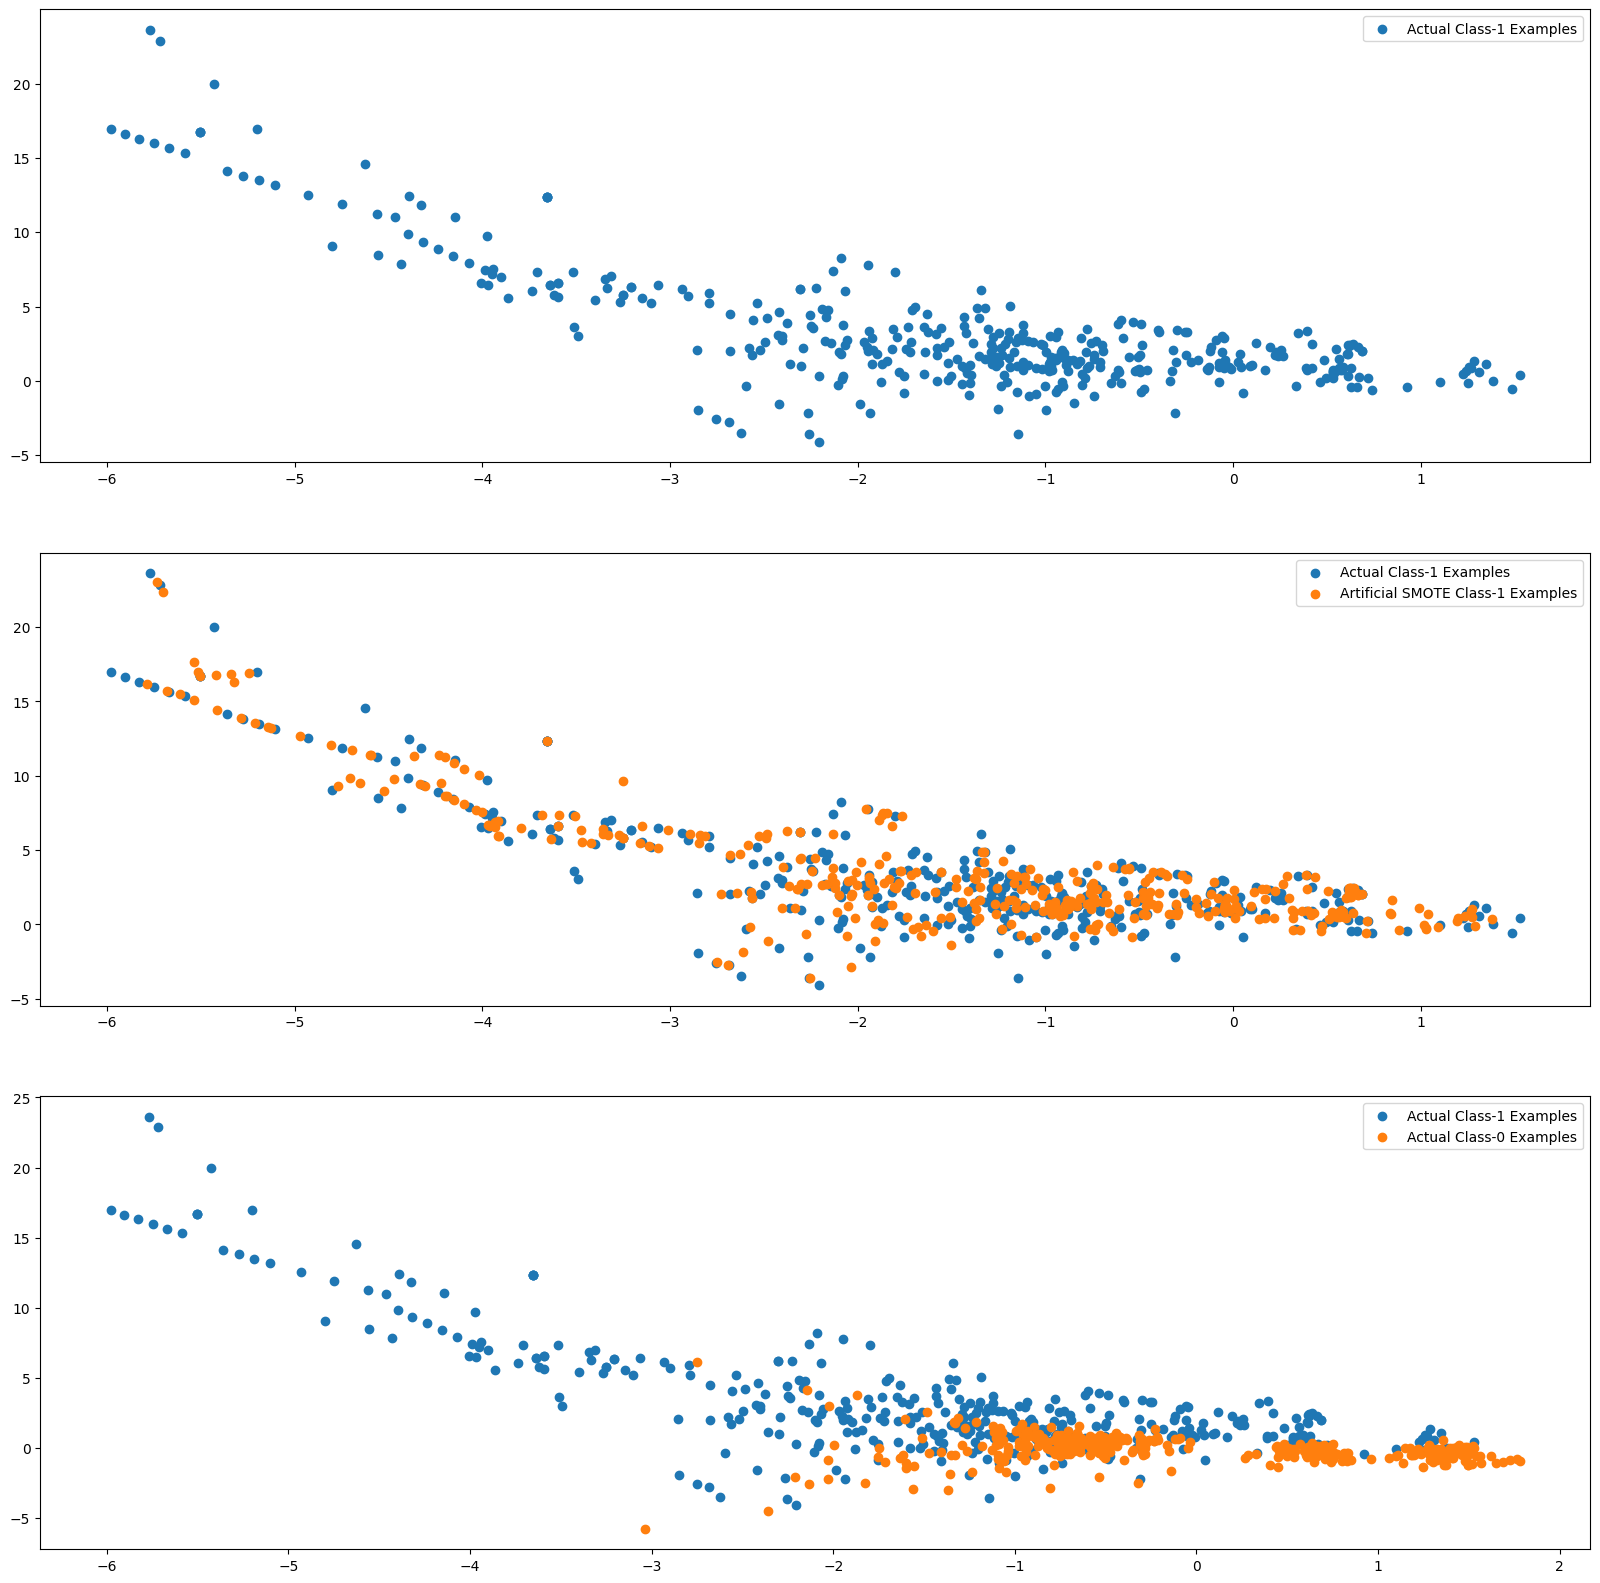

In [59]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### **1. Logistic Regression**

#### We have already perfomed cross validation on the X_train & y_train with optimum number of CV folds  to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [60]:
#Printing cross validated X_train and y_train

print("X_train_cv_lr shape:", X_train_cv_lr.shape)
print("X_test_cv_lr shape:", X_test_cv_lr.shape)
print("y_train_cv_lr shape:", y_train_cv_lr.shape)
print("y_test_cv_lr shape:", y_test_cv_lr.shape)

X_train_cv_lr shape: (182276, 29)
X_test_cv_lr shape: (45569, 29)
y_train_cv_lr shape: (182276,)
y_test_cv_lr shape: (45569,)


In [61]:
# Balancing classes on X_train_cv_lr & y_train_cv_lr using SMOTE

# Initialize SMOTE
smote_lr = SMOTE(random_state=42)

# Fitting and resample the training data
X_train_smote_lr, y_train_smote_lr = smote_lr.fit_resample(X_train_cv_lr, y_train_cv_lr)

# Displaying the new class distribution
print("Class distribution after SMOTE oversampling:", dict(pd.Series(y_train_smote_lr).value_counts()))


Class distribution after SMOTE oversampling: {0: 181960, 1: 181960}


In [62]:
#performing hyperparameter tuning

# Defining the parameter grid for RandomizedSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Range of regularization parameter values
    'penalty': ['l1', 'l2']        # Regularization types (L1, L2)
}

# Initialize the Logistic Regression model
lr_smote_model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize StratifiedKFold for cross-validation
cv_smote_lr = StratifiedKFold(n_splits=best_cv_lr, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_smote_lr = RandomizedSearchCV(estimator=lr_smote_model,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='roc_auc',
                                   cv=cv_smote_lr,
                                   random_state=42,
                                   n_jobs=-1,
                                   verbose=1)

# Fitting RandomizedSearchCV on one set of resampled data as an example
random_search_smote_lr.fit(X_train_smote_lr, y_train_smote_lr)

# Output best parameters and best score
print("Best parameters found:", random_search_smote_lr.best_params_)
print("Best cross-validation AUC score:", random_search_smote_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'penalty': 'l2', 'C': 100}
Best cross-validation AUC score: 0.9896991976149788


In [63]:
#printing the evaluation result by choosing a evaluation metric

# Initialize Logistic Regression with best hyperparameters from tuning
best_params_smote_lr = random_search_smote_lr.best_params_
best_smote_lr_model = LogisticRegression(**best_params_smote_lr, max_iter=1000, random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_smote_lr_model,X_train_smote_lr,X_test_cv_lr,y_train_smote_lr,y_test_cv_lr)

Training Set Evaluation Results:
Accuracy: 0.9467
Precision: 0.97
Recall: 0.92
F1 Score: 0.95
AUC Score: 0.9897

Test Set Evaluation Results:
Accuracy: 0.9694
Precision: 0.05
Recall: 0.94
F1 Score: 0.09
AUC Score: 0.9931


The model performs well on the training set, but the test set results show a significant drop in precision and F1 score, which might indicate overfitting or an issue with how the model generalizes to unseen data.

In [64]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_smote_lr = random_search_smote_lr.best_score_

print("Best Hyperparameters:", best_params_smote_lr)
print("Best Cross-Validation AUC Score:", best_score_smote_lr)

Best Hyperparameters: {'penalty': 'l2', 'C': 100}
Best Cross-Validation AUC Score: 0.9896991976149788


### **2. Decison Tree**

We have already perfomed cross validation on the X_train & y_train with optimum number of CV folds for decision tree algorithm to create:
- X_train_cv_dt
- X_test_cv_dt
- y_train_cv_dt
- y_test_cv_dt

In [65]:
#Printing cross validated X_train and y_train

print("X_train_cv_dt shape:", X_train_cv_dt.shape)
print("X_test_cv_dt shape:", X_test_cv_dt.shape)
print("y_train_cv_dt shape:", y_train_cv_dt.shape)
print("y_test_cv_dt shape:", y_test_cv_dt.shape)

X_train_cv_dt shape: (195295, 29)
X_test_cv_dt shape: (32550, 29)
y_train_cv_dt shape: (195295,)
y_test_cv_dt shape: (32550,)


In [66]:
#Balancing classes on X_train_cv_dt & y_train_cv_dt using SMOTE

# Initialize SMOTE
smote_dt = SMOTE(random_state=42)

# Fitting and resample the training data
X_train_smote_dt, y_train_smote_dt = smote_dt.fit_resample(X_train_cv_dt, y_train_cv_dt)

# Displaying the new class distribution
print("Class distribution after SMOTE oversampling:", dict(pd.Series(y_train_smote_dt).value_counts()))

Class distribution after SMOTE oversampling: {0: 194958, 1: 194958}


In [67]:
#performing hyperparameter tuning

# Defining the parameter grid for RandomizedSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],           # Range of maximum depth values to control overfitting
    'min_samples_split': randint(2, 20),          # Random range for min samples split
    'min_samples_leaf': randint(1, 20),           # Random range for min samples leaf
    'max_features': ['sqrt', 'log2', None]        # Number of features to consider when looking for the best split
}

# Initialize the Decision Tree model
dt_smote_model = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold for cross-validation
cv_smote_dt = StratifiedKFold(n_splits=best_cv_dt, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_smote_dt = RandomizedSearchCV(estimator=dt_smote_model,
                                          param_distributions=param_grid_dt,
                                          n_iter=10,
                                          scoring='roc_auc',
                                          cv=cv_smote_dt,
                                          random_state=42,
                                          n_jobs=-1,
                                          verbose=1)

# Fitting RandomizedSearchCV on the resampled training data
random_search_smote_dt.fit(X_train_smote_dt, y_train_smote_dt)

# Output best parameters and best score
print("Best parameters found:", random_search_smote_dt.best_params_)
print("Best cross-validation AUC score:", random_search_smote_dt.best_score_)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 12}
Best cross-validation AUC score: 0.9986298520919785


In [68]:
#printing the evaluation result by choosing a evaluation metric

# Initialize Decision Tree with best hyperparameters from tuning
best_params_smote_dt = random_search_smote_dt.best_params_
best_smote_dt_model = DecisionTreeClassifier(**best_params_smote_dt, random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_smote_dt_model,X_train_smote_dt,X_test_cv_dt,y_train_smote_dt,y_test_cv_dt)

Training Set Evaluation Results:
Accuracy: 0.9983
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC Score: 1.0000

Test Set Evaluation Results:
Accuracy: 0.9955
Precision: 0.25
Recall: 0.79
F1 Score: 0.38
AUC Score: 0.9020


The model is promising but shows signs of overfitting.
Random Oversampling worked to a degree, but further tuning or different balancing techniques might yield even better results.

In [69]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_smote_dt = random_search_smote_dt.best_score_

print("Best Hyperparameters:")
for param, value in best_params_smote_dt.items():
  print(f"\t{param}: {value}")
print("Best Cross-Validation AUC Score:", best_score_smote_dt)

Best Hyperparameters:
	max_depth: None
	max_features: sqrt
	min_samples_leaf: 7
	min_samples_split: 12
Best Cross-Validation AUC Score: 0.9986298520919785


### **3. XGBoost**

We have already perfomed cross validation on the X_train & y_train with optimum number of CV folds for XGBoost algorithm to create:
- X_train_cv_xgb
- X_test_cv_xgb
- y_train_cv_xgb
- y_test_cv_xgb

In [70]:
#Printing cross validated X_train and y_train

print("X_train_cv_xgb shape:", X_train_cv_xgb.shape)
print("X_test_cv_xgb shape:", X_test_cv_xgb.shape)
print("y_train_cv_xgb shape:", y_train_cv_xgb.shape)
print("y_test_cv_xgb shape:", y_test_cv_xgb.shape)

X_train_cv_xgb shape: (151896, 29)
X_test_cv_xgb shape: (75949, 29)
y_train_cv_xgb shape: (151896,)
y_test_cv_xgb shape: (75949,)


In [71]:
# Balancing classes on X_train_cv_xgb & y_train_cv_xgb using SMOTE

# Initialize SMOTE
smote_xgb = SMOTE(random_state=42)

# Fitting and resample the training data
X_train_smote_xgb, y_train_smote_xgb = smote_xgb.fit_resample(X_train_cv_xgb, y_train_cv_xgb)

# Displaying the new class distribution
print("Class distribution after SMOTE oversampling:", dict(pd.Series(y_train_smote_xgb).value_counts()))

Class distribution after SMOTE oversampling: {0: 151634, 1: 151634}


In [72]:
#performing hyperparameter tuning RandomizedSearchCV

# Defining a parameter distribution for RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': randint(50, 200),  # Number of trees in the boosting process
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of each tree
    'learning_rate': uniform(0.01, 0.3),  # Learning rate as a continuous uniform distribution
    'subsample': uniform(0.5, 0.5),  # Subsampling ratio for the training instances
    'colsample_bytree': uniform(0.5, 0.5),  # Subsampling ratio for columns
    'gamma': uniform(0, 5)  # Minimum loss reduction required to make a further partition
}

# Initialize the XGBoost model
xgb_smote_model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)

# Using StratifiedKFold for better class balance in each fold
cv_smote_xgb = StratifiedKFold(n_splits=best_cv_xgb, shuffle=True, random_state=42)

# Setting up RandomizedSearchCV with AUC as scoring metric and StratifiedKFold cross-validation
random_search_smote_xgb = RandomizedSearchCV(
    estimator=xgb_smote_model,
    param_distributions=param_dist_xgb,
    n_iter=10,  # Number of parameter settings to sample
    scoring='roc_auc',
    cv=cv_smote_xgb,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fitting RandomizedSearchCV on the training data
random_search_smote_xgb.fit(X_train_smote_xgb, y_train_smote_xgb)

# Output best parameters and best score
print("Best parameters found:", random_search_smote_xgb.best_params_)
print("Best cross-validation AUC score:", random_search_smote_xgb.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'colsample_bytree': 0.5779972601681014, 'gamma': 0.2904180608409973, 'learning_rate': 0.26985284373248053, 'max_depth': 10, 'n_estimators': 153, 'subsample': 0.8540362888980227}
Best cross-validation AUC score: 0.999989909330058


In [73]:
#printing the evaluation result by choosing a evaluation metric

# Initialize XGBoost with best hyperparameters from tuning
best_params_smote_xgb = random_search_smote_xgb.best_params_
best_smote_xgb_model = XGBClassifier(**best_params_smote_xgb, use_label_encoder=False, eval_metric='auc', random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_smote_xgb_model,X_train_smote_xgb,X_test_cv_xgb,y_train_smote_xgb,y_test_cv_xgb)

Training Set Evaluation Results:
Accuracy: 1.0000
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC Score: 1.0000

Test Set Evaluation Results:
Accuracy: 0.9993
Precision: 0.80
Recall: 0.80
F1 Score: 0.80
AUC Score: 0.9800


XGBoost is the best model for fraud detection in this case. It strikes a good balance between recall and precision, achieving a high F1 score on the test set and an impressive AUC score. This means it can identify a substantial number of fraud cases while keeping false positives manageable.

In [74]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_smote_xgb = random_search_smote_xgb.best_score_

print("Best Hyperparameters:")
for param, value in best_params_smote_xgb.items():
  print(f"\t{param}: {value}")
print("Best Cross-Validation AUC Score:", best_score_smote_xgb)

Best Hyperparameters:
	colsample_bytree: 0.5779972601681014
	gamma: 0.2904180608409973
	learning_rate: 0.26985284373248053
	max_depth: 10
	n_estimators: 153
	subsample: 0.8540362888980227
Best Cross-Validation AUC Score: 0.999989909330058


## **ADASYN**
- Build different models on the balanced dataset and see the result

### Print the class distribution after applying ADASYN

In [75]:
# Importing the package
from imblearn.over_sampling import ADASYN

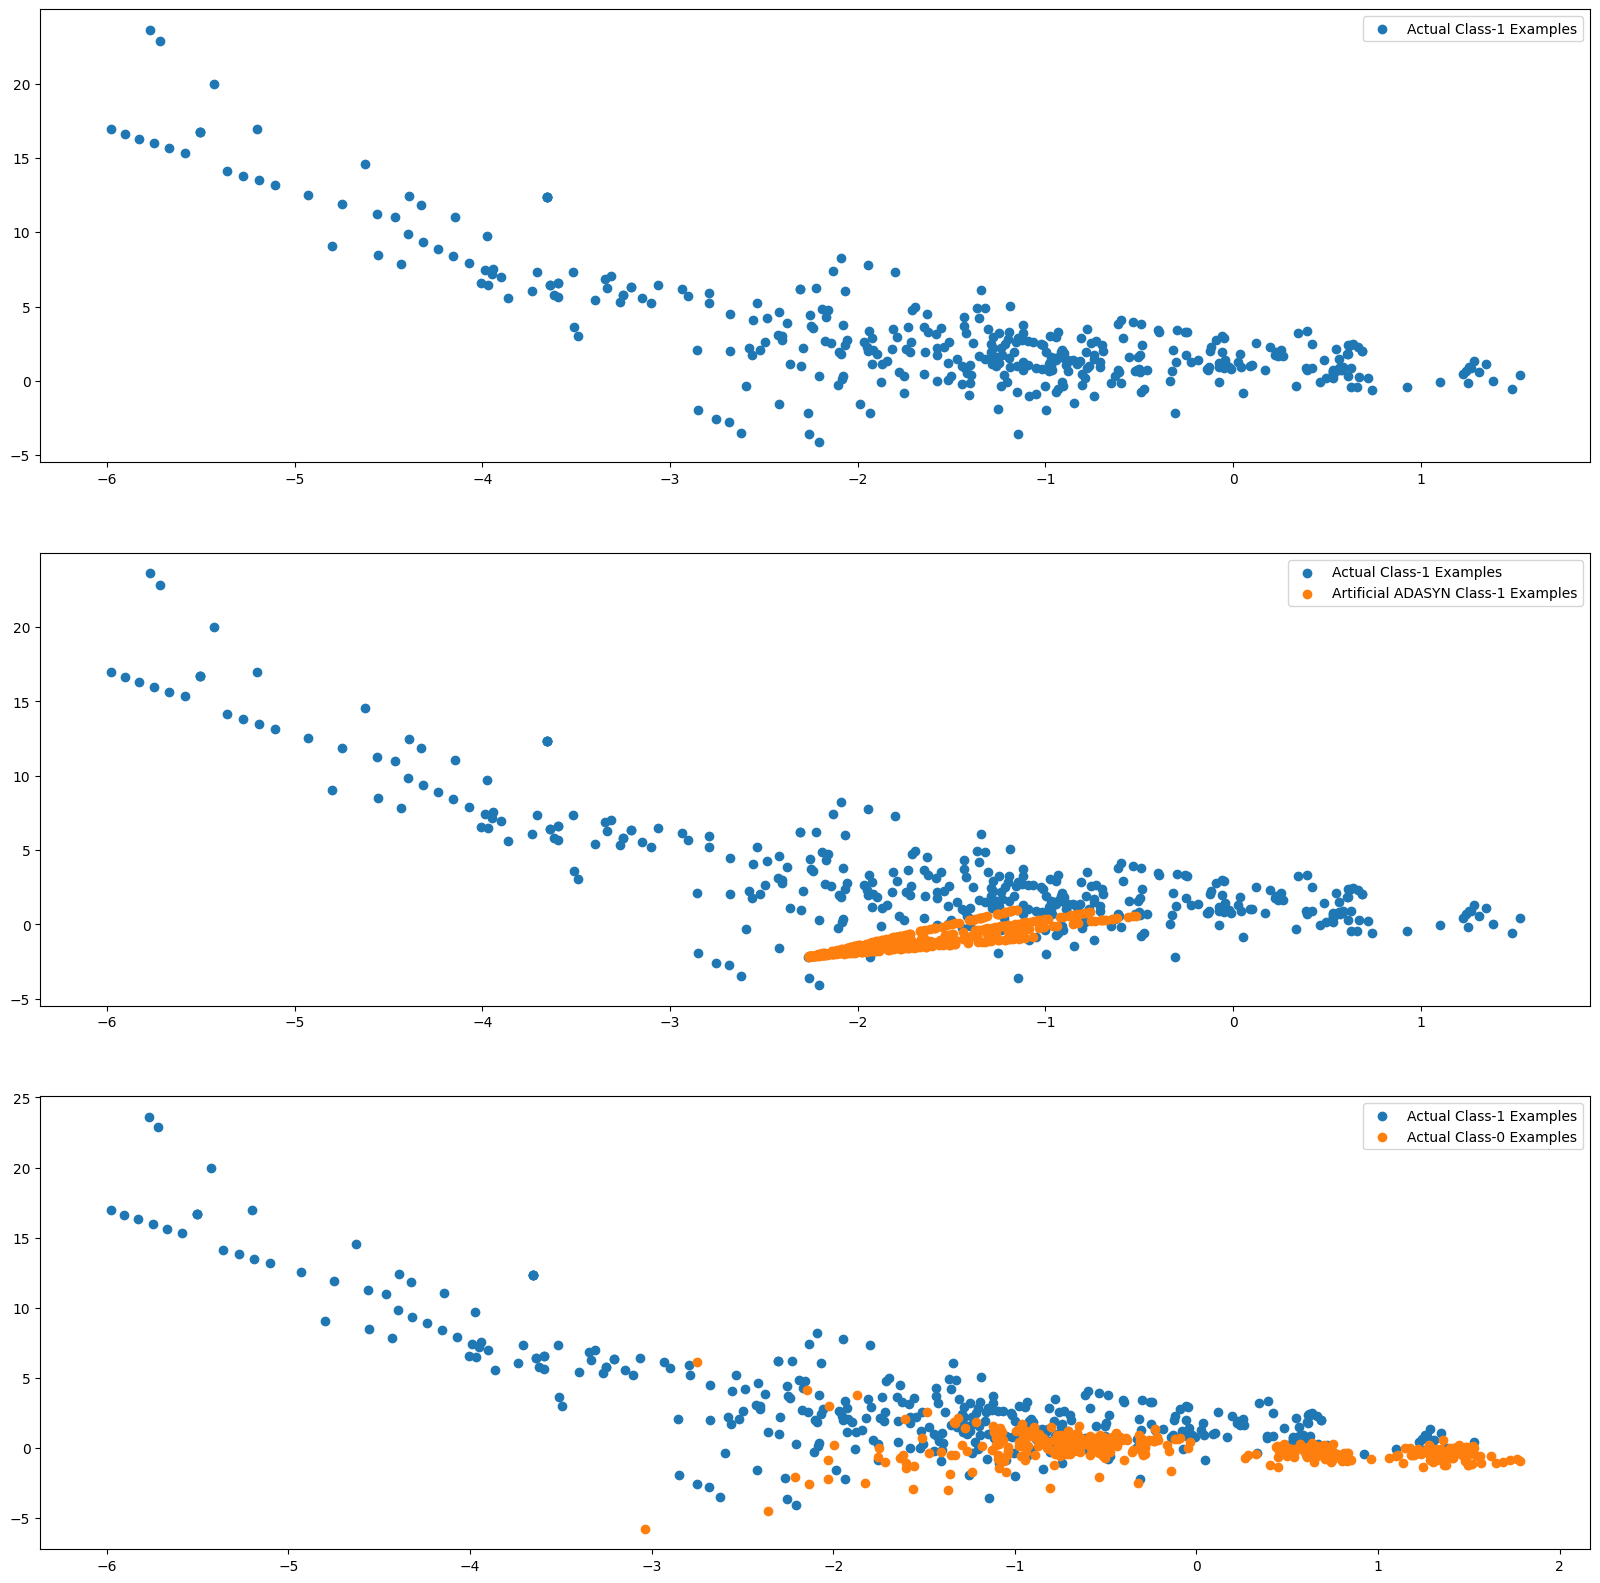

In [76]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### **1. Logistic Regression**

#### We have already perfomed cross validation on the X_train & y_train with optimum number of CV folds  to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [77]:
#Printing cross validated X_train and y_train

print("X_train_cv_lr shape:", X_train_cv_lr.shape)
print("X_test_cv_lr shape:", X_test_cv_lr.shape)
print("y_train_cv_lr shape:", y_train_cv_lr.shape)
print("y_test_cv_lr shape:", y_test_cv_lr.shape)

X_train_cv_lr shape: (182276, 29)
X_test_cv_lr shape: (45569, 29)
y_train_cv_lr shape: (182276,)
y_test_cv_lr shape: (45569,)


In [78]:
#Balancing classes on X_train_cv_lr & y_train_cv_lr using ADASYN

# Initialize ADASYN
adasyn_lr = ADASYN(random_state=42)

# Fitting and resample the training data
X_train_adasyn_lr, y_train_adasyn_lr = adasyn_lr.fit_resample(X_train_cv_lr, y_train_cv_lr)

# Displaying the new class distribution
print("Class distribution after ADASYN:", dict(pd.Series(y_train_adasyn_lr).value_counts()))

Class distribution after ADASYN: {1: 182013, 0: 181960}


In [79]:
#performing hyperparameter tuning

# Defining the parameter grid for RandomizedSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Range of regularization parameter values
    'penalty': ['l1', 'l2']        # Regularization types (L1, L2)
}

# Initialize the Logistic Regression model
lr_adasyn_model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize StratifiedKFold for cross-validation
cv_adasyn_dt = StratifiedKFold(n_splits=best_cv_lr, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_adasyn_lr = RandomizedSearchCV(estimator=lr_adasyn_model,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='roc_auc',
                                   cv=cv_adasyn_dt,
                                   random_state=42,
                                   n_jobs=-1,
                                   verbose=1)

# Fitting RandomizedSearchCV on one set of resampled data as an example
random_search_adasyn_lr.fit(X_train_adasyn_lr, y_train_adasyn_lr)

# Output best parameters and best score
print("Best parameters found:", random_search_adasyn_lr.best_params_)
print("Best cross-validation AUC score:", random_search_adasyn_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'penalty': 'l2', 'C': 1}
Best cross-validation AUC score: 0.9657039924279538


In [80]:
#printing the evaluation result by choosing a evaluation metric

# Initialize Logistic Regression with best hyperparameters from tuning
best_params_adasyn_lr = random_search_adasyn_lr.best_params_
best_adasyn_lr_model = LogisticRegression(**best_params_adasyn_lr, max_iter=1000, random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_adasyn_lr_model,X_train_adasyn_lr,X_test_cv_lr,y_train_adasyn_lr,y_test_cv_lr)

Training Set Evaluation Results:
Accuracy: 0.8964
Precision: 0.91
Recall: 0.88
F1 Score: 0.90
AUC Score: 0.9657

Test Set Evaluation Results:
Accuracy: 0.9087
Precision: 0.02
Recall: 0.97
F1 Score: 0.04
AUC Score: 0.9936


The model effectively catches most fraudulent transactions (high recall), which is vital in fraud detection. However, its low precision leads to many false positives, mislabeling legitimate transactions as fraud. This could cause frequent incorrect alerts, potentially frustrating customers and creating operational inefficiencies.

In [81]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_adasyn_lr = random_search_adasyn_lr.best_score_

print("Best Hyperparameters:", best_params_adasyn_lr)
print("Best Cross-Validation AUC Score:", best_score_adasyn_lr)

Best Hyperparameters: {'penalty': 'l2', 'C': 1}
Best Cross-Validation AUC Score: 0.9657039924279538


### **2. Decison Tree**

We have already perfomed cross validation on the X_train & y_train with optimum number of CV folds for decision tree algorithm to create:
- X_train_cv_dt
- X_test_cv_dt
- y_train_cv_dt
- y_test_cv_dt

In [82]:
#Printing cross validated X_train and y_train

print("X_train_cv_dt shape:", X_train_cv_dt.shape)
print("X_test_cv_dt shape:", X_test_cv_dt.shape)
print("y_train_cv_dt shape:", y_train_cv_dt.shape)
print("y_test_cv_dt shape:", y_test_cv_dt.shape)

X_train_cv_dt shape: (195295, 29)
X_test_cv_dt shape: (32550, 29)
y_train_cv_dt shape: (195295,)
y_test_cv_dt shape: (32550,)


In [83]:
#Balancing classes on X_train_cv_dt & y_train_cv_dt using ADASYN

# Initialize ADASYN
adasyn_dt = ADASYN(random_state=42)

# Fit and resample the training data
X_train_adasyn_dt, y_train_adasyn_dt = adasyn_dt.fit_resample(X_train_cv_dt, y_train_cv_dt)

# Displaying the new class distribution
print("Class distribution after ADASYN:", dict(pd.Series(y_train_adasyn_dt).value_counts()))

Class distribution after ADASYN: {1: 194987, 0: 194958}


In [84]:
#performing hyperparameter tuning

# Defining the parameter grid for RandomizedSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],             # Range of maximum depth values to control overfitting
    'min_samples_split': randint(2, 20),          # Random range for min samples split
    'min_samples_leaf': randint(1, 20),           # Random range for min samples leaf
    'max_features': ['sqrt', 'log2', None]        # Number of features to consider when looking for the best split
}

# Initialize the Decision Tree model
dt_adasyn_model = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold for cross-validation
cv_adasyn_dt = StratifiedKFold(n_splits=best_cv_dt, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_adasyn_dt = RandomizedSearchCV(estimator=dt_adasyn_model,
                                          param_distributions=param_grid_dt,
                                          n_iter=10,
                                          scoring='roc_auc',
                                          cv=cv_adasyn_dt,
                                          random_state=42,
                                          n_jobs=-1,
                                          verbose=1)

# Fit RandomizedSearchCV on the resampled training data
random_search_adasyn_dt.fit(X_train_adasyn_dt, y_train_adasyn_dt)

# Output best parameters and best score
print("Best parameters found:", random_search_adasyn_dt.best_params_)
print("Best cross-validation AUC score:", random_search_adasyn_dt.best_score_)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 12}
Best cross-validation AUC score: 0.9988210428874914


In [85]:
#printing the evaluation result by choosing a evaluation metric

# Initialize Decision Tree with best hyperparameters from tuning
best_params_adasyn_dt = random_search_adasyn_dt.best_params_
best_adasyn_dt_model = DecisionTreeClassifier(**best_params_adasyn_dt, random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_adasyn_dt_model,X_train_adasyn_dt,X_test_cv_dt,y_train_adasyn_dt,y_test_cv_dt)

Training Set Evaluation Results:
Accuracy: 0.9985
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC Score: 1.0000

Test Set Evaluation Results:
Accuracy: 0.9963
Precision: 0.30
Recall: 0.86
F1 Score: 0.45
AUC Score: 0.9374


This Decision Tree model trained with ADASYN data is not ideal for real-world fraud detection due to its low precision on the test set, despite its high recall. In practical applications, the model’s false positives would likely overwhelm the system.

In [86]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_adasyn_dt = random_search_adasyn_dt.best_score_

print("Best Hyperparameters:")
for param, value in best_params_adasyn_dt.items():
  print(f"\t{param}: {value}")
print("Best Cross-Validation AUC Score:", best_score_adasyn_dt)

Best Hyperparameters:
	max_depth: None
	max_features: sqrt
	min_samples_leaf: 7
	min_samples_split: 12
Best Cross-Validation AUC Score: 0.9988210428874914


### **3. XGBoost**

We have already perfomed cross validation on the X_train & y_train with optimum number of CV folds for XGBoost algorithm to create:
- X_train_cv_xgb
- X_test_cv_xgb
- y_train_cv_xgb
- y_test_cv_xgb

In [87]:
#Printing cross validated X_train and y_train

print("X_train_cv_xgb shape:", X_train_cv_xgb.shape)
print("X_test_cv_xgb shape:", X_test_cv_xgb.shape)
print("y_train_cv_xgb shape:", y_train_cv_xgb.shape)
print("y_test_cv_xgb shape:", y_test_cv_xgb.shape)

X_train_cv_xgb shape: (151896, 29)
X_test_cv_xgb shape: (75949, 29)
y_train_cv_xgb shape: (151896,)
y_test_cv_xgb shape: (75949,)


In [88]:
#Balancing classes on X_train_cv_dt & y_train_cv_dt using ADASYN

# Initialize ADASYN
adasyn_xgb = ADASYN(random_state=42)

# Fit and resample the training data
X_train_adasyn_xgb, y_train_adasyn_xgb = adasyn_xgb.fit_resample(X_train_cv_xgb, y_train_cv_xgb)

# Displaying the new class distribution
print("Class distribution after ADASYN:", dict(pd.Series(y_train_adasyn_xgb).value_counts()))

Class distribution after ADASYN: {1: 151646, 0: 151634}


In [89]:
#performing hyperparameter tuning RandomizedSearchCV

# Defining a parameter distribution for RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': randint(50, 200),  # Number of trees in the boosting process
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of each tree
    'learning_rate': uniform(0.01, 0.3),  # Learning rate as a continuous uniform distribution
    'subsample': uniform(0.5, 0.5),  # Subsampling ratio for the training instances
    'colsample_bytree': uniform(0.5, 0.5),  # Subsampling ratio for columns
    'gamma': uniform(0, 5)  # Minimum loss reduction required to make a further partition
}

# Initialize the XGBoost model
xgb_adasyn_model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)

# Using StratifiedKFold for better class balance in each fold
cv_adasyn_xgb = StratifiedKFold(n_splits=best_cv_xgb, shuffle=True, random_state=42)

# Setting up RandomizedSearchCV with AUC as scoring metric and StratifiedKFold cross-validation
random_search_adasyn_xgb = RandomizedSearchCV(
    estimator=xgb_adasyn_model,
    param_distributions=param_dist_xgb,
    n_iter=10,  # Number of parameter settings to sample
    scoring='roc_auc',
    cv=cv_adasyn_xgb,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fitting RandomizedSearchCV on the training data
random_search_adasyn_xgb.fit(X_train_adasyn_xgb, y_train_adasyn_xgb)

# Output best parameters and best score
print("Best parameters found:", random_search_adasyn_xgb.best_params_)
print("Best cross-validation AUC score:", random_search_adasyn_xgb.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'colsample_bytree': 0.5779972601681014, 'gamma': 0.2904180608409973, 'learning_rate': 0.26985284373248053, 'max_depth': 10, 'n_estimators': 153, 'subsample': 0.8540362888980227}
Best cross-validation AUC score: 0.9999930638114268


In [90]:
#printing the evaluation result by choosing a evaluation metric

# Initialize XGBoost with best hyperparameters from tuning
best_params_adasyn_xgb = random_search_adasyn_xgb.best_params_
best_adasyn_xgb_model = XGBClassifier(**best_params_adasyn_xgb, use_label_encoder=False, eval_metric='auc', random_state=42)

# Using evaluation() function to print evaluation metrics.
evaluation(best_adasyn_xgb_model,X_train_adasyn_xgb,X_test_cv_xgb,y_train_adasyn_xgb,y_test_cv_xgb)

Training Set Evaluation Results:
Accuracy: 1.0000
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC Score: 1.0000

Test Set Evaluation Results:
Accuracy: 0.9992
Precision: 0.78
Recall: 0.79
F1 Score: 0.78
AUC Score: 0.9808


The XGBoost model with ADASYN data shows strong results, with a good F1 score and high AUC on the test set, indicating it is a suitable model for fraud detection in this context. Its performance suggests it will detect a significant portion of fraud cases while keeping the false positive rate at a manageable level.

In [91]:
#printing the optimum value of hyperparameters

# Best hyperparameters and best score
best_score_adasyn_xgb = random_search_adasyn_xgb.best_score_

print("Best Hyperparameters:")
for param, value in best_params_adasyn_xgb.items():
  print(f"\t{param}: {value}")
print("Best Cross-Validation AUC Score:", best_score_adasyn_xgb)

Best Hyperparameters:
	colsample_bytree: 0.5779972601681014
	gamma: 0.2904180608409973
	learning_rate: 0.26985284373248053
	max_depth: 10
	n_estimators: 153
	subsample: 0.8540362888980227
Best Cross-Validation AUC Score: 0.9999930638114268


**Conclusion:** The XGBoost model with Random Oversampling is the most reliable choice for fraud detection in this context, as it achieves the highest overall performance with a strong balance of precision, recall, F1 Score, and AUC on the test set. Its high precision and recall mean it effectively catches fraud cases while minimizing false positives, making it a more reliable option for real-world application in fraud detection.

## **Model Selection**

### **Proceeding with the XGBoost model with Random Oversampling which shows the best result**
- Applying the best hyperparameter on the XGBoost model after balancing classes using Random Over Sampling
- Predicting on the test dataset

In [92]:
#Balancing classes on X_train & y_train using Random Oversampling

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Displaying the new class distribution
print("Class distribution after oversampling:", dict(pd.Series(y_train_balanced).value_counts()))

Class distribution after oversampling: {0: 227451, 1: 227451}


In [93]:
# Printing best hyperparameters for XGBoost model using Random Oversampling

print("Best Hyperparameters for XGBoost Using Random Oversampling:")
for param, value in best_params_ros_xgb.items():
  print(f"\t{param}: {value}")

Best Hyperparameters for XGBoost Using Random Oversampling:
	colsample_bytree: 0.7962072844310213
	gamma: 0.23225206359998862
	learning_rate: 0.1922634555704315
	max_depth: None
	n_estimators: 122
	subsample: 0.5325257964926398


In [94]:
# Initialize the model with the best hyperparameters for XGBoost
clf = XGBClassifier(
    **best_params_ros_xgb,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

# Fiting the model on the balanced training data
clf.fit(X_train_balanced, y_train_balanced)

# Predictions on the training set
y_train_pred = clf.predict(X_train_balanced)
y_train_pred_proba = clf.predict_proba(X_train_balanced)[:, 1]

# Predicting probabilities for the positive class
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]
y_test_pred = clf.predict(X_test)

# Calculating the AUC score
test_auc_score = roc_auc_score(y_test, y_test_pred_proba)

In [95]:
#printing the evaluation result by choosing a evaluation metric

# Using evaluation() function to print evaluation metrics.
evaluation(clf,X_train_balanced,X_test,y_train_balanced,y_test)

Training Set Evaluation Results:
Accuracy: 1.0000
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC Score: 1.0000

Test Set Evaluation Results:
Accuracy: 0.9995
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
AUC Score: 0.9749


The XGBoost model performs strongly on both the training and test sets, especially in terms of recall and AUC on the test set, which are crucial metrics in fraud detection.

The F1 score balances precision and recall, and a score of 0.87 indicates the model has a strong balance between avoiding false positives and capturing fraud.

### Printing the important features of the XGBoost with Random Over Sampling model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 10


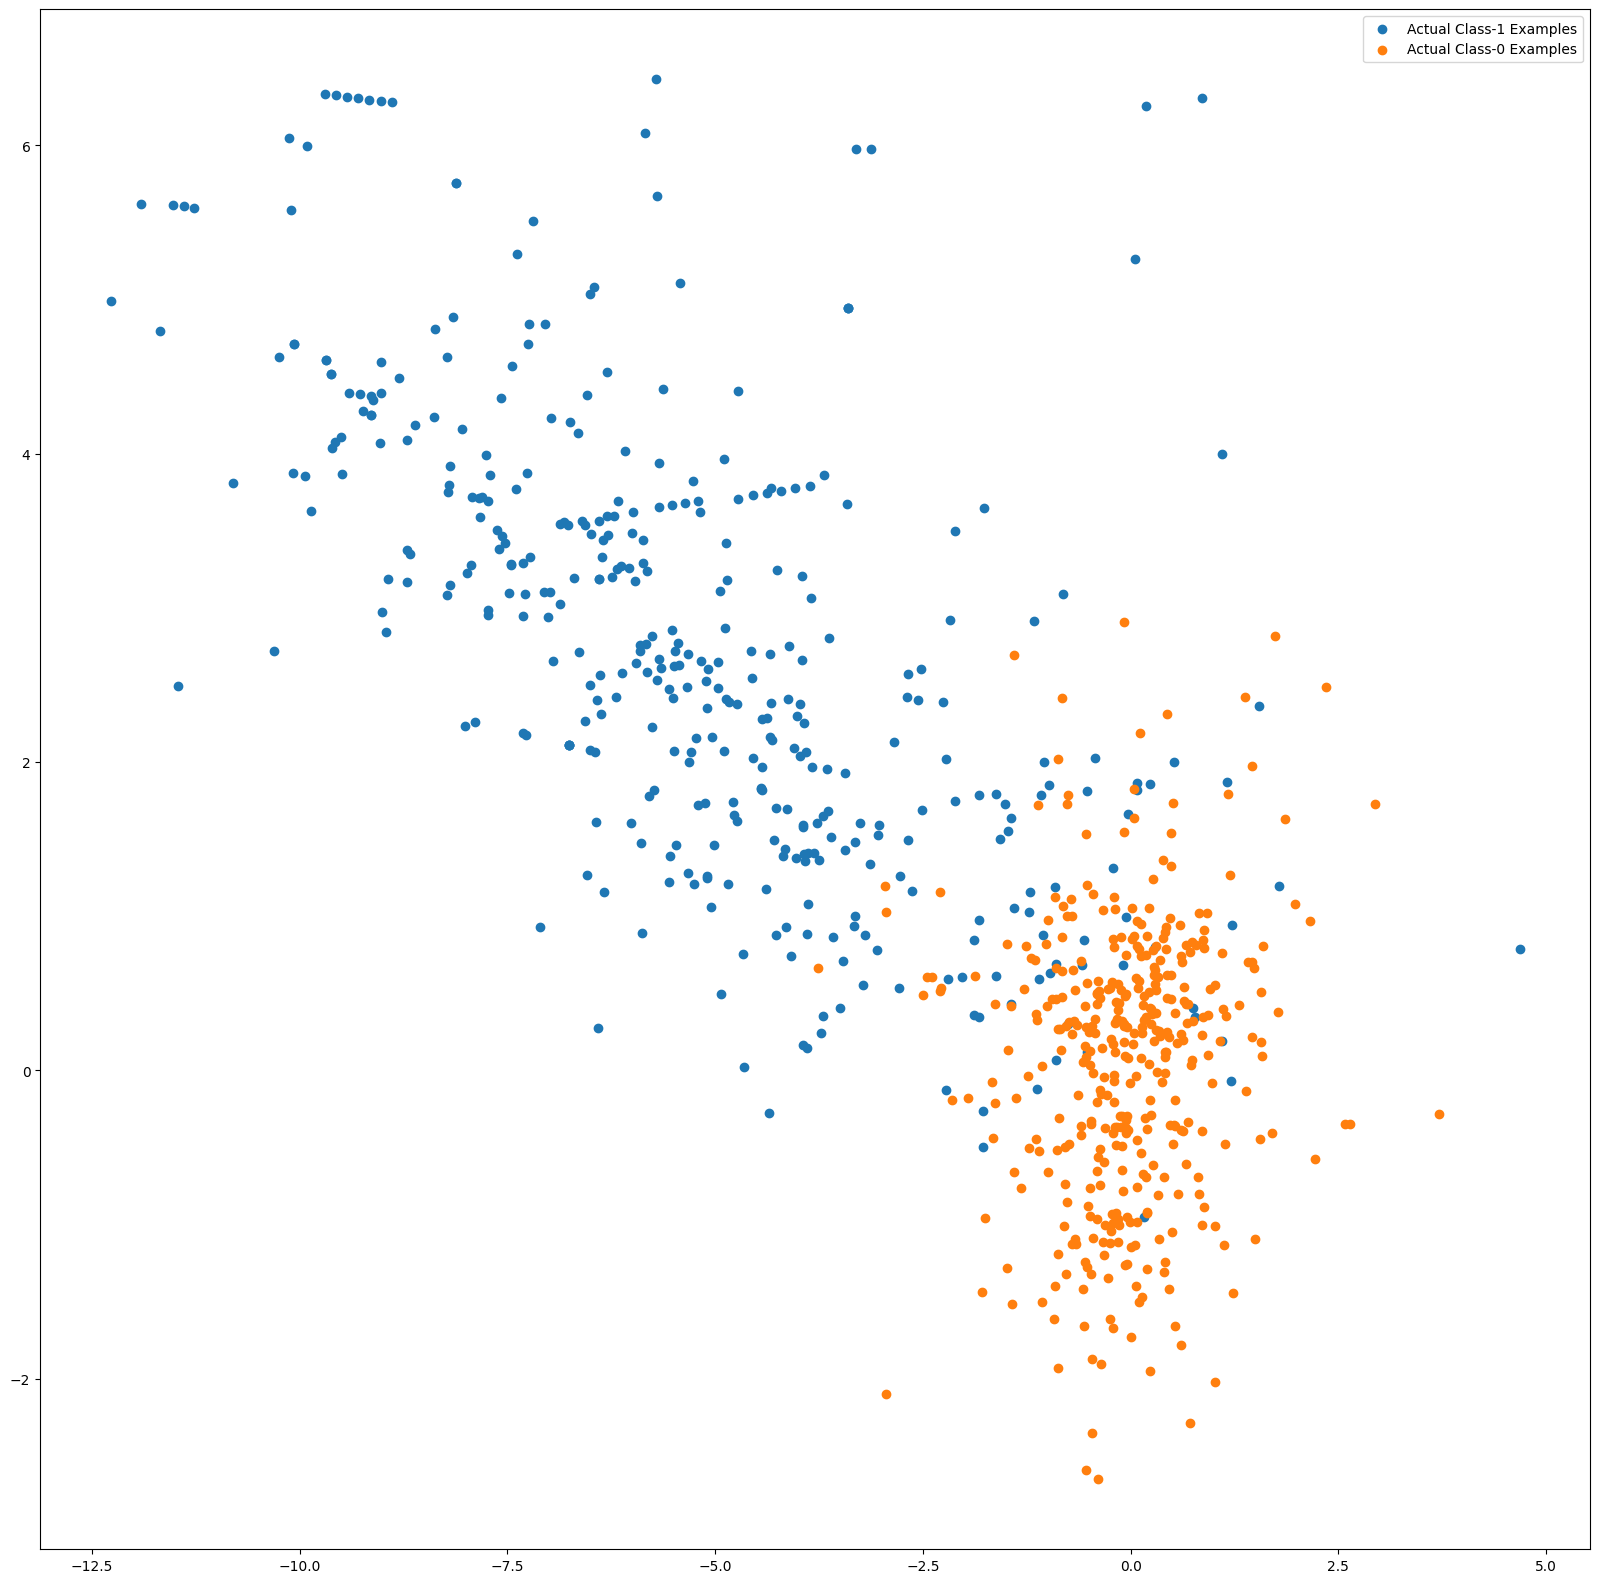

In [96]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Confusion Matrix:
[[56851    13]
 [   13    85]]
TPR (Sensitivity, Recall): 0.87
FPR (Fall-out): 0.00
TNR (Specificity): 1.00
FNR (Miss Rate): 0.13


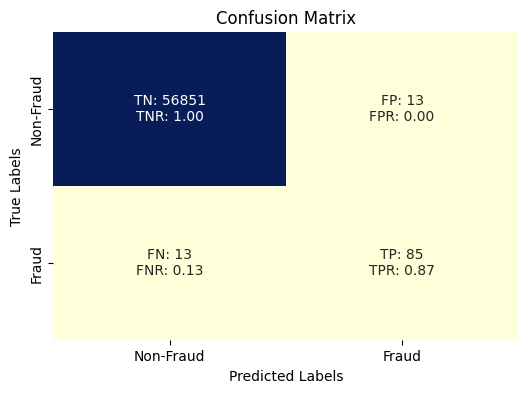

In [97]:
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extracting TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculating TPR, FPR, TNR, FNR
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
TNR = TN / (TN + FP) if (TN + FP) != 0 else 0
FNR = FN / (FN + TP) if (FN + TP) != 0 else 0

# Printing the confusion matrix with labels
print("Confusion Matrix:")
print(cm)
print(f"TPR (Sensitivity, Recall): {TPR:.2f}")
print(f"FPR (Fall-out): {FPR:.2f}")
print(f"TNR (Specificity): {TNR:.2f}")
print(f"FNR (Miss Rate): {FNR:.2f}")

# Creating a labeled matrix for visualization
labels = np.array([[f"TN: {TN}\nTNR: {TNR:.2f}", f"FP: {FP}\nFPR: {FPR:.2f}"],
                   [f"FN: {FN}\nFNR: {FNR:.2f}", f"TP: {TP}\nTPR: {TPR:.2f}"]])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='YlGnBu', cbar=False,
            xticklabels=['Non-Fraud','Fraud'],
            yticklabels=['Non-Fraud','Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

False Positive Rate (FPR): [0.         0.         0.         ... 0.99992966 0.99996483 1.        ]
True Positive Rate (TPR): [0.         0.01020408 0.04081633 ... 1.         1.         1.        ]
Thresholds: [          inf 9.9999952e-01 9.9999881e-01 ... 2.0438318e-08 1.8598691e-08
 1.2635276e-08]
Best Threshold: 0.0010379723
Best TPR at Threshold: 0.9285714285714286
Best FPR at Threshold: 0.015879994372537985


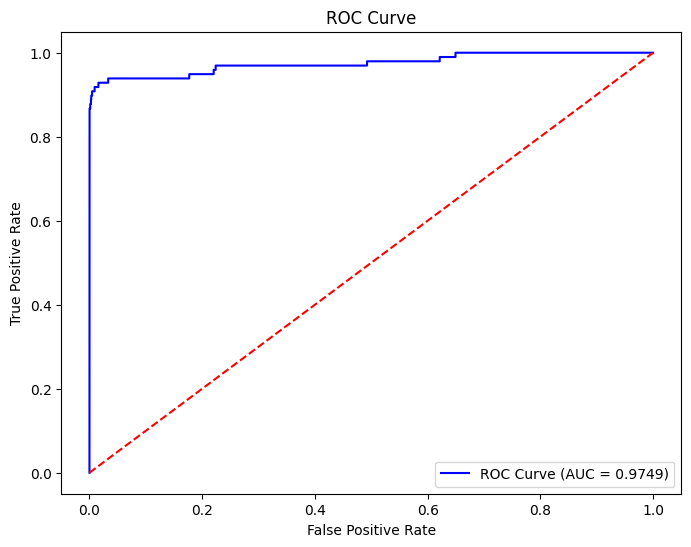

In [98]:
#### Print the FPR,TPR & select the best threshold from the roc curve

from sklearn.metrics import roc_curve, auc

# Printing fpr,tpr, threshold using y_test and y_test_pred which are already defined
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculating AUC score
auc_score = roc_auc_score(y_test, y_test_pred_proba)

# Printing FPR, TPR, and thresholds
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)
print("Thresholds:", thresholds)

# Calculating the optimal threshold
# Here we maximize the Youden's J statistic, which is (TPR - FPR) at each threshold
j_scores = tpr - fpr
best_threshold_index = j_scores.argmax()
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)
print("Best TPR at Threshold:", tpr[best_threshold_index])
print("Best FPR at Threshold:", fpr[best_threshold_index])

# Ploting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

With a high TPR (92.86%) at the chosen threshold, the model is highly sensitive, meaning it’s effective at identifying positive cases (e.g., potential fraud cases).

The low FPR (1.59%) means the model also manages to keep misclassifications of actual negatives relatively low, which is desirable, especially in fraud detection where false positives can have a cost.

This threshold selection balances the trade-off between identifying positives and minimizing false positives, making the model well-suited for applications where catching positives is important, but false positives should be minimized. In the context of fraud detection, this threshold helps maximize detection of fraudulent transactions while keeping the false alarm rate manageable.

In [99]:
print('Train auc =', metrics.roc_auc_score(y_train_balanced, y_train_pred_proba))
print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred_proba))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)

threshold = thresholds[np.argmax(tpr - fpr)]
print("Best Threshold : ",threshold)

Train auc = 1.0
Test auc = 0.9749314153066967
Best Threshold :  0.0010379723


**Model:** XGBoost with Random Over Sampling

**Accuracy:** 0.9995

**Precision:** 0.87

**Recall:** 0.87

**F1 Score:** 0.87

**AUC Score:** 0.9749

**Best Threshold:** 0.0010379723

**Best TPR at Threshold:** 0.9285714285714286

**Best FPR at Threshold:** 0.015879994372537985

**Conclusion:**  Overall, XGBoost with Random Over Sampling shows solid performance in fraud detection with a good balance between recall and specificity, making it highly reliable for practical applications where high fraud capture rates are essential without overwhelming users or systems with false positives.

## **Capstone Project - Credit Card Fraud Detection**

**Completed By-**
* Ramya Konathala
* Lydia Marina
* Chandan Kumar